<center><h1> IFT-6758  Data Science  </h1></center>
<center><h2> Fall - 2020 </h2></center> 
<center><h3> Social Media Prediction Kaggle Project </h3></center> 
<center><h3> </h3></center> 
<center><h3>Team Name: Social-Dilema</h3></center> 

# Data Science Pipeline

<img src='https://miro.medium.com/max/1400/1*CyK1miQfy1OHmv2wUcjT1w.png'>

# Inspecting Social Media Prediction Project Dataset


[Social Media Prediction ](https://www.kaggle.com/c/ift6758-a20/data)

***Description***:

 The main task for the data challenge is to predict the number of 'likes' for given details about the simulated profiles of users on social media.

You have been provided with various attributes about the visual aspects of the users' social media profiles, the basic details, the profile pictures used in the simulation. With the is information, you need to predict how many 'likes' the users could've likely received.

There is a CSV file of various collected features that has been provided, in addition to images showing the profile pictures of the users (based on the simulation) 

***Evaluation:***

The evaluation metric for this competition is a modified RMSE score. The RMSLE score is given by:
Submission Format

For every user in the test set, submission files should contain two columns: `Id` and `Predicted`. There cannot be any duplicates for the `Id` field and it is case-sensitive. The `Predicted` indicates the predicted `NumProfileLikes` should be non-negative integers. However, the submission is flexible enough to work with real-valued predictions as well.

The file should contain a header and have the following format:

Id,                 Predicted

---



49I3SOKLI2CMNGP4,   19000

***Data Description***

The files provided are described here.

Overall there is a csv file each for the training and test. Additionally, a set of profile images are provided each for train and test.

***File descriptions***

    train.csv - the training set
    profile_images_train.zip - profile images of users specified in the training set (`Profile Image` field)
    test.csv - the test set which has the same structure as the train set except for the field that needs to be predicted (Number of Profile Likes)
    profile_images_test.zip - profile images of users specified in the test set (`Profile Image` field)
    sample_submission.csv - a sample submission file in the correct format with random values for predictions

***Data fields***

    Id - Anonymous unique alphanumeric id for each user
    User Name - The screen name of the user
    Personal URL - The link to the personal webpage of the user, if provided
    User Name - The screen name of the user
    Profile Cover Image Status - Whether the user has used a profile 'cover image' (additional image) on the profile
    Profile Verification Status - The status of the user's profile verification (verified, nt verified, pending, etc.) (validating if the profile is of a genuine user)
    Profile Text Color - The hex code (RRGGBB) of the user profile's text color
    Profile Page Color - The hex code (RRGGBB) of the user profile's page color
    Profile Theme Color - The hex code (RRGGBB) of the user profile's theme color
    Is Profile View Size Customized? - The boolean value if the user has customized the view size of the profile
    UTC Offset The difference of the local time (zone) of the user with respect to the UTC specified in seconds along with a sign +/- to denote the difference
    Location - The text provided by the user to indicate his/her location
    Location Public Visibility - The status of the user's location being shared publicly
    User Language - The abbreviation of the language set by the user to use the profile specified according to (ISO 639-1)[https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes]
    Profile Creation Timestamp - The string indicating the timestamp of the user's profile creation date and time specified as an ISO string
    User Time Zone - The name of the city/time zone of the user
    Num of Followers - The number of followers the user's profile
    Num of People Following - The number of profiles followed by the user
    Num of Status Updates
    Num of Direct Messages
    Profile Category - The category of the user profile as identified by the user - eg. `business`, `government`, etc.
    Avg Daily Profile Visit Duration in seconds - The average values of the number of seconds visitors spend on the user's profile page.
    Avg Daily Profile Clicks - The average number of mouse clicks that visitors of the user's profile make - whether it is for reading threads or pressing other buttons.
    Profile Image - The filename of the PNG image corresponding to the user's profile image used in the simulation. These filenames point to the image file name in the train_profile_images.zip and test_profile_images.zip files.
    Num of Profile Likes - The number of profile 'likes' received by the user from visitors/followers 

***Rules***

    Teams of 3-4
    Try to achieve an RMSLE of less than 1.5, ideally it should be as close as possible to 0
    You are NOT allowed to use additional external data
    You are NOT obliged to use all the features present in the dataset.
    You can only use features derived from the given features.
    2 submissions max per day
    Please checkpoint your code for each submission you make, so that it is accessible during the code submission.
    Clean and preprocess the data as you deem appropriate before trying to fit a model.
    Apply yourself!
    Have fun!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
import os
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
os.environ['PYTHONHASHSEED']=str(1)
tf.random.set_seed(1)
np.random.seed(1)
random.seed(1)

#### Download the dataset files

#### Load the data into DataFrames

In [ ]:
#load files into content
#df_train_s = pd.read_csv("train.csv")
#df_test_s = pd.read_csv("test.csv")
# give train and test path
train_path="df_train_img_canny.csv"
test_path="df_test_img_canny.csv"


In [ ]:
df_train_s = pd.read_csv(train_path)
df_test_s = pd.read_csv(test_path)

#### Get DataFrame info

In [ ]:
df_train_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Id                                           7500 non-null   object 
 1   User Name                                    7500 non-null   object 
 2   Personal URL                                 3256 non-null   object 
 3   Profile Cover Image Status                   7410 non-null   object 
 4   Profile Verification Status                  7500 non-null   object 
 5   Profile Text Color                           7434 non-null   object 
 6   Profile Page Color                           7422 non-null   object 
 7   Profile Theme Color                          7428 non-null   object 
 8   Is Profile View Size Customized?             7500 non-null   bool   
 9   UTC Offset                                   7014 non-null   float64
 10  

In [ ]:
df_train_s.head()

,Id,User Name,Personal URL,Profile Cover Image Status,Profile Verification Status,Profile Text Color,Profile Page Color,Profile Theme Color,Is Profile View Size Customized?,UTC Offset,Location,Location Public Visibility,User Language,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Num of Profile Likes,cluster_image
0,AL85S14OMDPF01I9,Mf9vfld4Vfe,NaN,Set,Verified,db1a2c,eaf0f2,e70409,False,39600.0,NaN,Enabled,en,Thu Nov 27 05:24:59 +0000 2008,Sydney,95763,4289,30809,873,business,14.792,1.5761,AL85S14OMDPF01I9.png,2815,3
1,HI11QOPD7BLJTO7Q,xl9gaGN0hxM_,NaN,Set,Verified,0099cc,f6ffd1,fff04d,False,NaN,mumbai,Enabled,en,Fri Jan 15 18:00:46 +0000 2010,NaN,1018746,289,8150,290,unknown,8.183,11.2782,HI11QOPD7BLJTO7Q.png,1242,2
2,JS49LP5P72RI1OQB,d_uiMm,NaN,Set,Not verified,1fc2de,efefef,1fc2de,False,-18000.0,NYC + 70 Countries Worldwide,Enabled,en,Fri Oct 02 20:15:06 +0000 2009,Central Time (US & Canada),13444,1876,4698,227,unknown,31.823,0.5725,JS49LP5P72RI1OQB.png,1559,3
3,S0GDSC09MACCLBJP,hfylaRr,https://blob/e/g9pex_vS.com,Not set,Verified,050000,616161,00090a,False,-14400.0,"Indianapolis, In",Enabled,en,Thu Feb 19 14:37:22 +0000 2009,Eastern Time (US & Canada),339168,1148,53216,4035,business,23.052,4.0265,S0GDSC09MACCLBJP.png,6342,3
4,CRSEMK4QER6LDJSA,hRR1sDGlz5,https://blob/v/Szeo.h4/.com,Set,Not verified,58424d,f7f7f7,000000,False,-18000.0,"777 Beach Blvd. Biloxi, MS",Enabled,en,Tue Mar 31 13:27:52 +0000 2009,Central Time (US & Canada),9215,93,3271,130,unknown,8.418,3.9229,CRSEMK4QER6LDJSA.png,1078,2


How many feature variables to we have?

In [ ]:
# this include the label
df_train_s.shape

(7500, 25)

Which is the target variable here?

***Num of Profile Likes***

#### Inspect for null values

In [ ]:
df_train_s.isnull().sum()

Id                                                0
User Name                                         0
Personal URL                                   4244
Profile Cover Image Status                       90
Profile Verification Status                       0
Profile Text Color                               66
Profile Page Color                               78
Profile Theme Color                              72
Is Profile View Size Customized?                  0
UTC Offset                                      486
Location                                       1461
Location Public Visibility                        0
User Language                                     0
Profile Creation Timestamp                        0
User Time Zone                                  486
Num of Followers                                  0
Num of People Following                           0
Num of Status Updates                             0
Num of Direct Messages                            0
Profile Cate

Some brief data metrics about the data collected. We can see that the number of likes has a high standard deviation, 16448. It appears that there is a high disparity as the mean is 5387.38 but 75% of the posts have less than 4832 likes.

In [ ]:
df_train_s.describe()

,UTC Offset,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Num of Profile Likes,cluster_image
count,7014.000000,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7423.000000,7424.000000,7500.000000,7500.000000
mean,-5898.887938,1.002162e+06,8.071664e+03,3.672141e+04,3.054240e+03,23.006997,3.277067,5386.678800,2.479333
std,17324.766638,3.660142e+06,4.733062e+04,1.481801e+05,3.817096e+04,8.863637,2.548133,16488.834061,1.084495
min,-39600.000000,5.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.253000,0.004500,0.000000,1.000000
25%,-18000.000000,2.540175e+04,1.600000e+02,3.568000e+03,1.520000e+02,16.364500,1.482525,208.750000,2.000000
50%,-14400.000000,1.839130e+05,5.285000e+02,1.040500e+04,6.340000e+02,23.205000,2.569650,1370.000000,3.000000
75%,7200.000000,9.077292e+05,1.556750e+03,2.778325e+04,2.297500e+03,29.574500,4.316150,4832.750000,3.000000
max,46800.000000,1.089908e+08,1.002277e+06,5.836805e+06,3.233474e+06,48.885000,23.062900,550594.000000,4.000000


#### Drop columns

In [ ]:
# drop no value-added features
toDrop = ['Id','User Name', 'Profile Text Color', 'Profile Page Color', 'Profile Theme Color',
'Location']
df_cleaned = df_train_s.drop(toDrop,axis=1)

In [ ]:
#verify df shape (number of features)
df_cleaned.shape

(7500, 19)

In [ ]:
df_cleaned.head()

,Personal URL,Profile Cover Image Status,Profile Verification Status,Is Profile View Size Customized?,UTC Offset,Location Public Visibility,User Language,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Num of Profile Likes,cluster_image
0,NaN,Set,Verified,False,39600.0,Enabled,en,Thu Nov 27 05:24:59 +0000 2008,Sydney,95763,4289,30809,873,business,14.792,1.5761,AL85S14OMDPF01I9.png,2815,2
1,NaN,Set,Verified,False,NaN,Enabled,en,Fri Jan 15 18:00:46 +0000 2010,NaN,1018746,289,8150,290,unknown,8.183,11.2782,HI11QOPD7BLJTO7Q.png,1242,3
2,NaN,Set,Not verified,False,-18000.0,Enabled,en,Fri Oct 02 20:15:06 +0000 2009,Central Time (US & Canada),13444,1876,4698,227,unknown,31.823,0.5725,JS49LP5P72RI1OQB.png,1559,2
3,https://blob/e/g9pex_vS.com,Not set,Verified,False,-14400.0,Enabled,en,Thu Feb 19 14:37:22 +0000 2009,Eastern Time (US & Canada),339168,1148,53216,4035,business,23.052,4.0265,S0GDSC09MACCLBJP.png,6342,2
4,https://blob/v/Szeo.h4/.com,Set,Not verified,False,-18000.0,Enabled,en,Tue Mar 31 13:27:52 +0000 2009,Central Time (US & Canada),9215,93,3271,130,unknown,8.418,3.9229,CRSEMK4QER6LDJSA.png,1078,1


In [ ]:
df_cleaned.isnull().sum()

Personal URL                                   4244
Profile Cover Image Status                       90
Profile Verification Status                       0
Is Profile View Size Customized?                  0
UTC Offset                                      486
Location Public Visibility                        0
User Language                                     0
Profile Creation Timestamp                        0
User Time Zone                                  486
Num of Followers                                  0
Num of People Following                           0
Num of Status Updates                             0
Num of Direct Messages                            0
Profile Category                                  0
Avg Daily Profile Visit Duration in seconds      77
Avg Daily Profile Clicks                         76
Profile Image                                     0
Num of Profile Likes                              0
cluster_image                                     0
dtype: int64

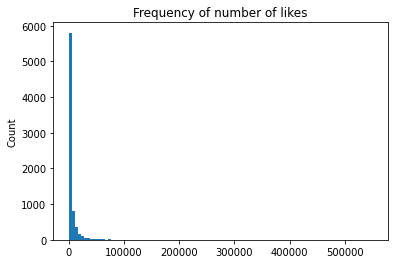

In [ ]:
plt.hist(df_cleaned['Num of Profile Likes'].dropna(),bins=100)
plt.ylabel('Count')
plt.title('Frequency of number of likes');

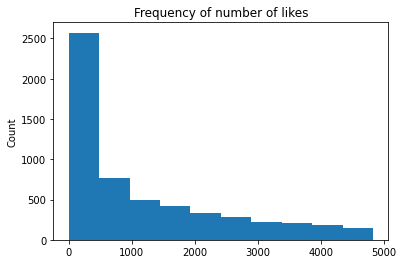

In [ ]:
plt.hist(df_cleaned['Num of Profile Likes'].dropna(),range=(0,df_cleaned['Num of Profile Likes'].dropna().quantile(q=0.75)))
plt.ylabel('Count')
plt.title('Frequency of number of likes');

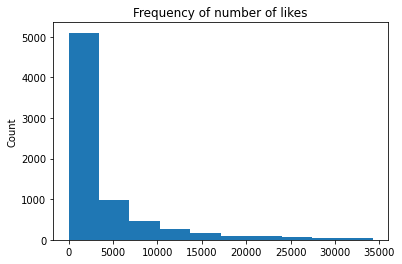

In [ ]:
plt.hist(df_cleaned['Num of Profile Likes'].dropna(),range=(0,df_cleaned['Num of Profile Likes'].dropna().quantile(q=0.975)))
plt.ylabel('Count')
plt.title('Frequency of number of likes');

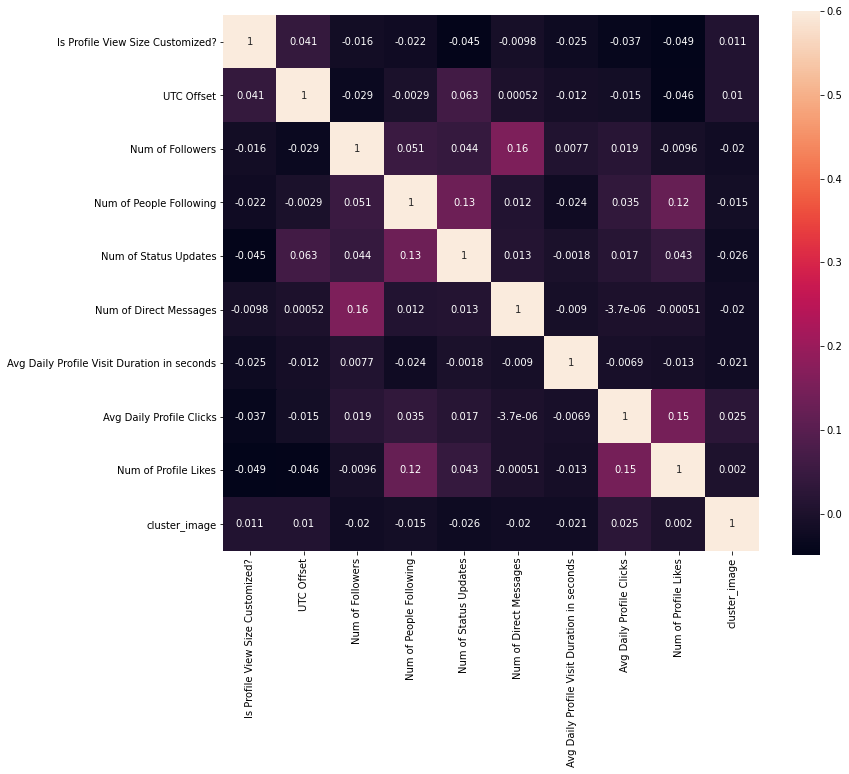

In [ ]:
#print correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(df_cleaned.corr(), vmax=0.6, square=True, annot=True);
#sns.heatmap(df_train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True);

# Feature Engineering


### Feature 1: Profile Verification Status'

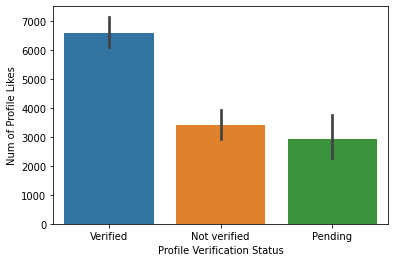

In [ ]:
#Visualize the count of number of profile likes
sns.barplot(x='Profile Verification Status', y='Num of Profile Likes', data=df_cleaned);

In [ ]:
df_cleaned['Profile Verification Status'].replace(['Verified', 'Not verified','Pending'], ['1', '2','3'], inplace=True)

In [ ]:
df_cleaned.head()

,Personal URL,Profile Cover Image Status,Profile Verification Status,Is Profile View Size Customized?,UTC Offset,Location Public Visibility,User Language,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Num of Profile Likes,cluster_image
0,NaN,Set,1,False,39600.0,Enabled,en,Thu Nov 27 05:24:59 +0000 2008,Sydney,95763,4289,30809,873,business,14.792,1.5761,AL85S14OMDPF01I9.png,2815,2
1,NaN,Set,1,False,NaN,Enabled,en,Fri Jan 15 18:00:46 +0000 2010,NaN,1018746,289,8150,290,unknown,8.183,11.2782,HI11QOPD7BLJTO7Q.png,1242,3
2,NaN,Set,2,False,-18000.0,Enabled,en,Fri Oct 02 20:15:06 +0000 2009,Central Time (US & Canada),13444,1876,4698,227,unknown,31.823,0.5725,JS49LP5P72RI1OQB.png,1559,2
3,https://blob/e/g9pex_vS.com,Not set,1,False,-14400.0,Enabled,en,Thu Feb 19 14:37:22 +0000 2009,Eastern Time (US & Canada),339168,1148,53216,4035,business,23.052,4.0265,S0GDSC09MACCLBJP.png,6342,2
4,https://blob/v/Szeo.h4/.com,Set,2,False,-18000.0,Enabled,en,Tue Mar 31 13:27:52 +0000 2009,Central Time (US & Canada),9215,93,3271,130,unknown,8.418,3.9229,CRSEMK4QER6LDJSA.png,1078,1


In [ ]:
## Converting pclass into three separate boolean variables
dummy_PvStatus = pd.get_dummies(df_cleaned['Profile Verification Status'], prefix='Profile Verification Status')
dummy_PvStatus.head()

,Profile Verification Status_1,Profile Verification Status_2,Profile Verification Status_3
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0


In [ ]:
# Merging these new classes with the main data.
df_cleaned = df_cleaned.merge(dummy_PvStatus, left_index=True, right_index=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Personal URL                                 3256 non-null   object 
 1   Profile Cover Image Status                   7410 non-null   object 
 2   Profile Verification Status                  7500 non-null   object 
 3   Is Profile View Size Customized?             7500 non-null   bool   
 4   UTC Offset                                   7014 non-null   float64
 5   Location Public Visibility                   7500 non-null   object 
 6   User Language                                7500 non-null   object 
 7   Profile Creation Timestamp                   7500 non-null   object 
 8   User Time Zone                               7014 non-null   object 
 9   Num of Followers                             7500 non-null   int64  
 10  

### Feature 2: Profile Cover Image Status

Almost equal numbers , so I dont include

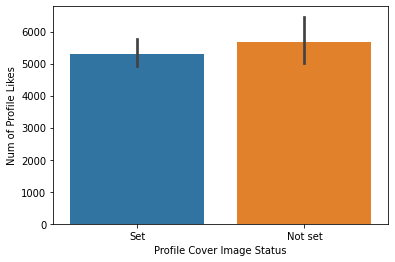

In [ ]:
# Relation of Profile Cover Image Status with Num of Profile Likes
sns.barplot(x='Profile Cover Image Status', y='Num of Profile Likes', data=df_cleaned);

In [ ]:
  df_cleaned['Profile Cover Image Status'].fillna(method='ffill', inplace=True)
  df_cleaned['Profile Cover Image Status'].replace(['Set', 'Not set'], ['1', '0'], inplace=True)

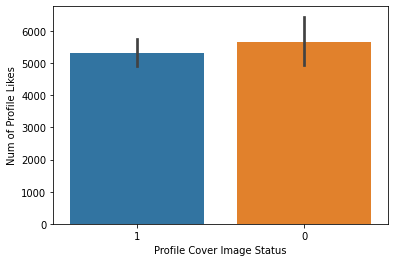

In [ ]:
sns.barplot(x='Profile Cover Image Status', y='Num of Profile Likes', data=df_cleaned);

In [ ]:
df_cleaned['Profile Cover Image Status'].isnull().sum()

0

In [ ]:
df_cleaned['Profile Cover Image Status'].replace(['Set', 'Not set'], ['1', '0'], inplace=True)

In [ ]:
df_cleaned.head()

,Personal URL,Profile Cover Image Status,Profile Verification Status,Is Profile View Size Customized?,UTC Offset,Location Public Visibility,User Language,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Num of Profile Likes,cluster_image,Profile Verification Status_1,Profile Verification Status_2,Profile Verification Status_3
0,NaN,1,1,False,39600.0,Enabled,en,Thu Nov 27 05:24:59 +0000 2008,Sydney,95763,4289,30809,873,business,14.792,1.5761,AL85S14OMDPF01I9.png,2815,2,1,0,0
1,NaN,1,1,False,NaN,Enabled,en,Fri Jan 15 18:00:46 +0000 2010,NaN,1018746,289,8150,290,unknown,8.183,11.2782,HI11QOPD7BLJTO7Q.png,1242,3,1,0,0
2,NaN,1,2,False,-18000.0,Enabled,en,Fri Oct 02 20:15:06 +0000 2009,Central Time (US & Canada),13444,1876,4698,227,unknown,31.823,0.5725,JS49LP5P72RI1OQB.png,1559,2,0,1,0
3,https://blob/e/g9pex_vS.com,0,1,False,-14400.0,Enabled,en,Thu Feb 19 14:37:22 +0000 2009,Eastern Time (US & Canada),339168,1148,53216,4035,business,23.052,4.0265,S0GDSC09MACCLBJP.png,6342,2,1,0,0
4,https://blob/v/Szeo.h4/.com,1,2,False,-18000.0,Enabled,en,Tue Mar 31 13:27:52 +0000 2009,Central Time (US & Canada),9215,93,3271,130,unknown,8.418,3.9229,CRSEMK4QER6LDJSA.png,1078,1,0,1,0


### Feature 3: Is Profile View Size Customized?

Replaced True with 0 and False with 1

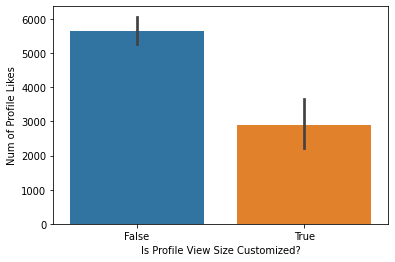

In [ ]:
# Relation of Profile View Size Customized with Num of Profile Likes
sns.barplot(x='Is Profile View Size Customized?', y='Num of Profile Likes', data=df_cleaned);

In [ ]:
df_cleaned['Is Profile View Size Customized?'].replace([False, True], ['0', '1'], inplace=True)

In [ ]:
df_cleaned.sample()

,Personal URL,Profile Cover Image Status,Profile Verification Status,Is Profile View Size Customized?,UTC Offset,Location Public Visibility,User Language,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Num of Profile Likes,cluster_image,Profile Verification Status_1,Profile Verification Status_2,Profile Verification Status_3
3866,https://blob/A16qdp_.o.com,1,1,0,-14400.0,Enabled,en,Tue Jun 16 20:38:05 +0000 2009,Eastern Time (US & Canada),249415,1165,38294,4819,celebrity,24.723,5.1928,M62TTIDTDNJD840P.png,5,3,1,0,0


### Feature 4: Location Public Visibility

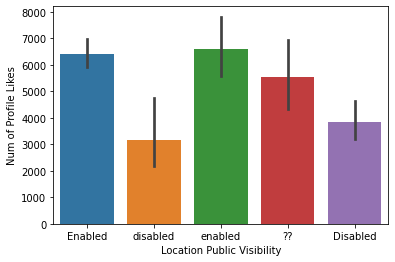

In [ ]:
# Relation of Location Public Visibility with Num of Profile Likes
sns.barplot(x='Location Public Visibility', y='Num of Profile Likes', data=df_cleaned);

Replace enabled with Enabled,disabled with Disabled and ?? with unknown

In [ ]:
df_cleaned['Location Public Visibility'].replace(['enabled', 'disabled'], ['Enabled', 'Disabled'], inplace=True)

In [ ]:
df_cleaned['Location Public Visibility'].replace(['Enabled', 'Disabled','??'], ['1', '2','3'], inplace=True)

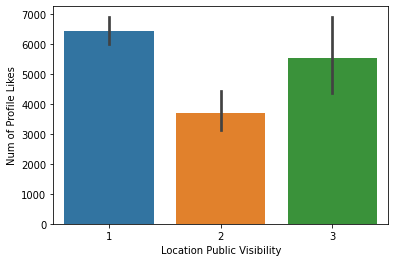

In [ ]:
# Relation of Location Public Visibility with Num of Profile Likes
sns.barplot(x='Location Public Visibility', y='Num of Profile Likes', data=df_cleaned);

### Feature 5: Profile Category

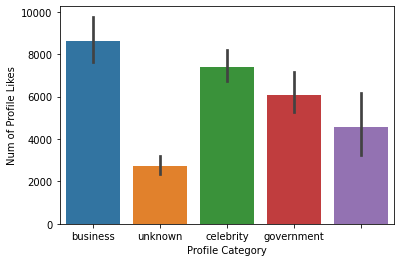

In [ ]:
# Relation of Profile Category with Num of Profile Likes
sns.barplot(x='Profile Category', y='Num of Profile Likes', data=df_cleaned);

In [ ]:
df_cleaned['Profile Category'].value_counts()

unknown       3360
business      1839
celebrity     1401
government     660
               240
Name: Profile Category, dtype: int64

In [ ]:
df_cleaned['Profile Category'].replace([' '],['unknown'], inplace=True)

In [ ]:
df_cleaned['Profile Category'].value_counts()

unknown       3600
business      1839
celebrity     1401
government     660
Name: Profile Category, dtype: int64

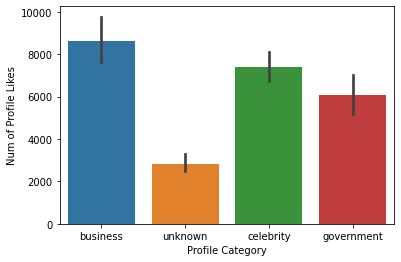

In [ ]:
sns.barplot(x='Profile Category', y='Num of Profile Likes', data=df_cleaned);

In [ ]:
df_cleaned['Profile Category'].replace(['business','celebrity','government','unknown'],['1','2','3','4'], inplace=True)

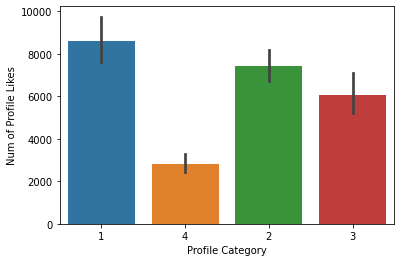

In [ ]:
sns.barplot(x='Profile Category', y='Num of Profile Likes', data=df_cleaned);

### Feature 6: Num of Followers

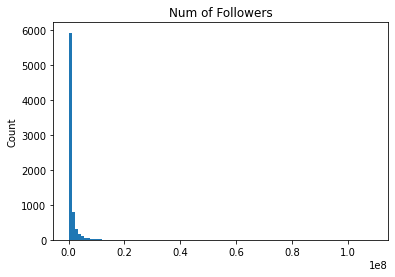

In [ ]:
plt.hist(df_cleaned['Num of Followers'].dropna(),bins=100)
plt.ylabel('Count')
plt.title('Num of Followers');

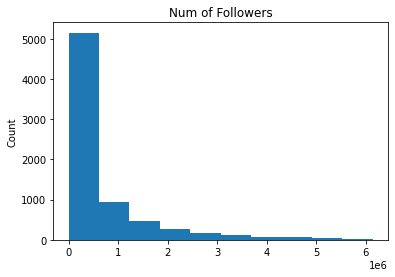

In [ ]:
plt.hist(df_cleaned['Num of Followers'].dropna(),range=(0,df_cleaned['Num of Followers'].dropna().quantile(q=0.975)))
plt.ylabel('Count')
plt.title('Num of Followers');

In [ ]:
df_cleaned['weekday'] = pd.DatetimeIndex(df_cleaned['Profile Creation Timestamp']).weekday

0       11.469642
1       13.834084
2        9.506363
3       12.734254
4        9.128696
          ...    
7495     8.713911
7496    12.543227
7497     9.982668
7498    11.396459
7499    12.653968
Name: Num of Followers, Length: 7500, dtype: float64

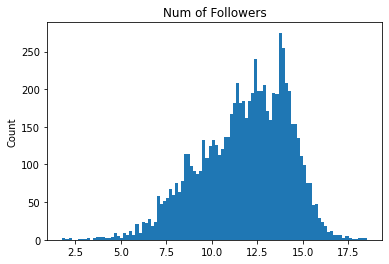

In [ ]:
plt.hist(np.log(1+df_cleaned['Num of Followers'].dropna()), bins=100)
plt.ylabel('Count')
plt.title('Num of Followers');

df_cleaned['Num of Followers']= np.log(1+df_cleaned['Num of Followers'])
df_cleaned['Num of Followers']

### Feature 7: Num of Status Updates

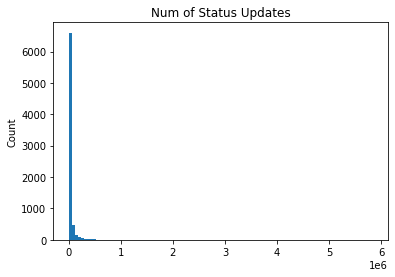

In [ ]:
plt.hist(df_cleaned['Num of Status Updates'].dropna(),bins=100)
plt.ylabel('Count')
plt.title('Num of Status Updates');

In [ ]:
df_cleaned['Num of Status Updates'].describe()

count    7.500000e+03
mean     3.672141e+04
std      1.481801e+05
min      1.000000e+00
25%      3.568000e+03
50%      1.040500e+04
75%      2.778325e+04
max      5.836805e+06
Name: Num of Status Updates, dtype: float64

In [ ]:
import numpy as np
import pandas as pd

conditions = [
    df_cleaned['Num of Status Updates'] < 3.568000e+03,
    df_cleaned['Num of Status Updates'] < 1.040500e+04,
    df_cleaned['Num of Status Updates'] < 2.778325e+04,
    True
]

outputs = [
    1, 2, 3, 4
]

df_cleaned['average likes'] = np.select(conditions, outputs)

In [ ]:

avg_likes =df_cleaned.groupby('average likes')['Num of Profile Likes'].mean()

In [ ]:
avg_likes

average likes
1456.850667     1242
3231.265067     1559
6586.431467     6342
10272.168000    1078
Name: Num of Profile Likes, dtype: int64

In [ ]:
df_cleaned['average likes']

0                NaN
1        1456.850667
2        3231.265067
3        6586.431467
4       10272.168000
            ...     
7495             NaN
7496             NaN
7497             NaN
7498             NaN
7499             NaN
Name: average likes, Length: 7500, dtype: float64

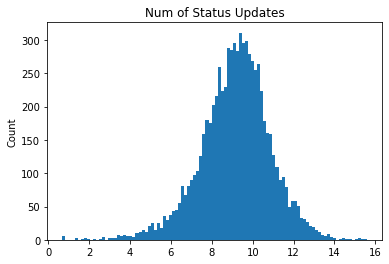

In [ ]:
df_cleaned['Num of Status Updates']= np.log(1+df_cleaned['Num of Status Updates'])
plt.hist(df_cleaned['Num of Status Updates'].dropna(),bins=100)
plt.ylabel('Count')
plt.title('Num of Status Updates');

### Feature 8: Num of People Following 

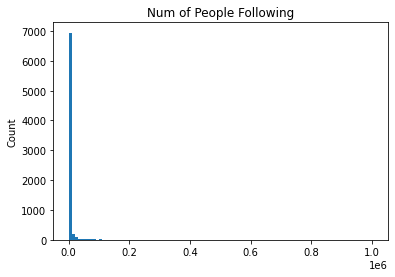

In [ ]:
plt.hist(df_cleaned['Num of People Following'].dropna(),bins=100)
plt.ylabel('Count')
plt.title('Num of People Following');

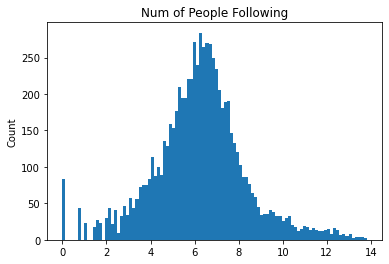

In [ ]:
df_cleaned['Num of People Following']= np.log(1+df_cleaned['Num of People Following'])
plt.hist(df_cleaned['Num of People Following'].dropna(),bins=100)
plt.ylabel('Count')
plt.title('Num of People Following');

### Feature 9: Num of Direct Messages

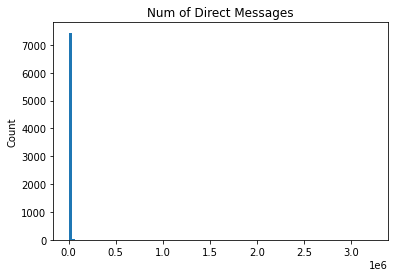

In [ ]:
plt.hist(df_cleaned['Num of Direct Messages'].dropna(),bins=100)
plt.ylabel('Count')
plt.title('Num of Direct Messages');

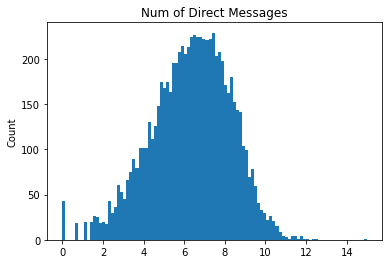

In [ ]:
df_cleaned['Num of Direct Messages']= np.log(1+df_cleaned['Num of Direct Messages'])
plt.hist(df_cleaned['Num of Direct Messages'].dropna(),bins=100)
plt.ylabel('Count')
plt.title('Num of Direct Messages');

### Feature 10: Avg Daily Profile Visit Duration in seconds

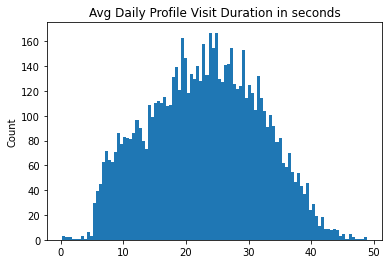

In [ ]:
plt.hist(df_cleaned['Avg Daily Profile Visit Duration in seconds'].dropna(),bins=100)
plt.ylabel('Count')
plt.title('Avg Daily Profile Visit Duration in seconds');

### Feature 10: Avg Daily Profile Clicks

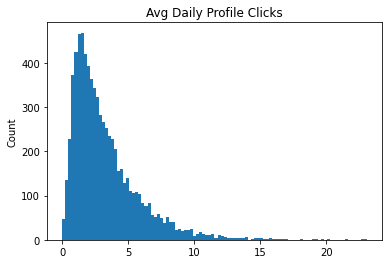

In [ ]:
plt.hist(df_cleaned['Avg Daily Profile Clicks'].dropna(),bins=100)
plt.ylabel('Count')
plt.title('Avg Daily Profile Clicks');

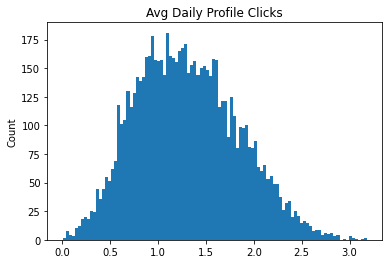

In [ ]:
df_cleaned['Avg Daily Profile Clicks']= np.log(1+df_cleaned['Avg Daily Profile Clicks'])
plt.hist(df_cleaned['Avg Daily Profile Clicks'].dropna(),bins=100)
plt.ylabel('Count')
plt.title('Avg Daily Profile Clicks');

### Feature 11:User Language

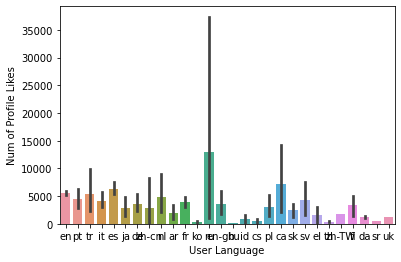

In [ ]:
sns.barplot(x='User Language', y='Num of Profile Likes', data=df_cleaned);

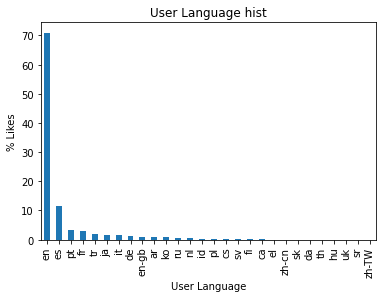

In [ ]:
(df_cleaned['User Language'].value_counts(normalize=True)*100).plot(kind="bar")
plt.title("User Language hist")
plt.ylabel("% Likes")
plt.xlabel("User Language")
plt.show();

In [ ]:
#df_cleaned.loc[~df_cleaned['User Language'].isin(['en','es','pt','fr','tr']), 'User Language'] = 'other'
df_cleaned.loc[~df_cleaned['User Language'].isin(['en','es','pt']), 'User Language'] = 'other'

In [ ]:
  dummy_User_Language = pd.get_dummies(df_cleaned['User Language'], prefix='User_Lan') 
  df_cleaned = df_cleaned.merge(dummy_User_Language, left_index=True, right_index=True)

In [ ]:
df_cleaned.sample()

,Personal URL,Profile Cover Image Status,Profile Verification Status,Is Profile View Size Customized?,UTC Offset,Location Public Visibility,User Language,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Num of Profile Likes,cluster_image,Profile Verification Status_1,Profile Verification Status_2,Profile Verification Status_3,User_Lan_en,User_Lan_es,User_Lan_other,User_Lan_pt
3176,https://blob/_hk5polBBf.com,1,2,0,-14400.0,1,en,Fri Jan 16 14:37:39 +0000 2009,Eastern Time (US & Canada),13.123325,13.120474,10.034823,8.340456,1,12.845,1.666782,67FSMER5TIRPKT8K.png,55002,2,0,1,0,1,0,0,0


### Feature 12:Profile Creation Timestamp




In [ ]:
df_cleaned['year'] = pd.DatetimeIndex(df_cleaned['Profile Creation Timestamp']).year

NameError: ignored

In [ ]:
df_cleaned['weekday'] = pd.DatetimeIndex(df_cleaned['Profile Creation Timestamp']).weekday

NameError: ignored

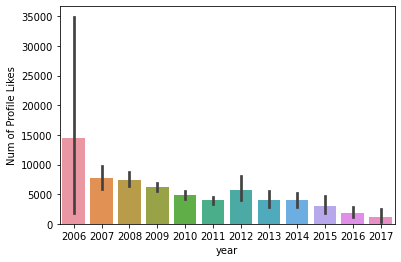

In [ ]:
sns.barplot(x='year', y='Num of Profile Likes', data=df_cleaned);

### Feature 13:UTC offset





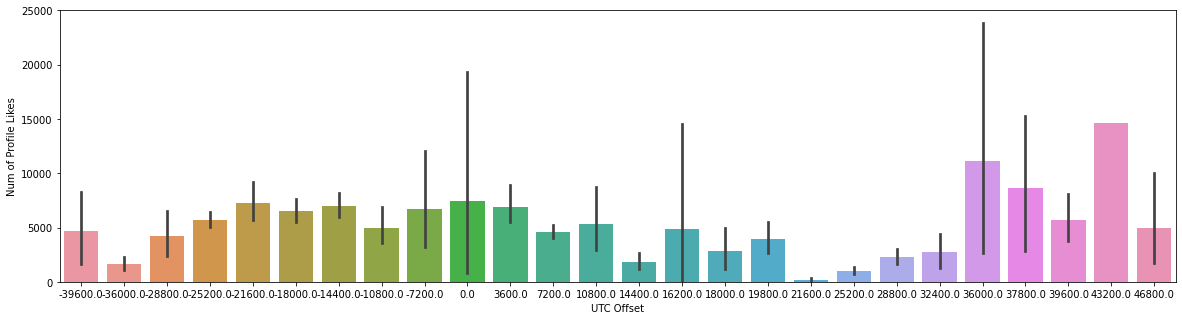

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='UTC Offset', y='Num of Profile Likes', data=df_cleaned);


In [ ]:
df_cleaned['UTC Offset'].fillna(method='ffill', inplace=True)

In [ ]:
df_cleaned['UTC Offset']  = df_cleaned['UTC Offset']/3600
df_cleaned['UTC Offset'] = pd.cut(df_cleaned['UTC Offset'],(-15,-10,-5,0,5,10,15),labels=[0, 1, 2,3,4,5])
df_cleaned['UTC Offset']



0       5
1       5
2       1
3       2
4       1
       ..
7495    1
7496    2
7497    3
7498    2
7499    4
Name: UTC Offset, Length: 7500, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

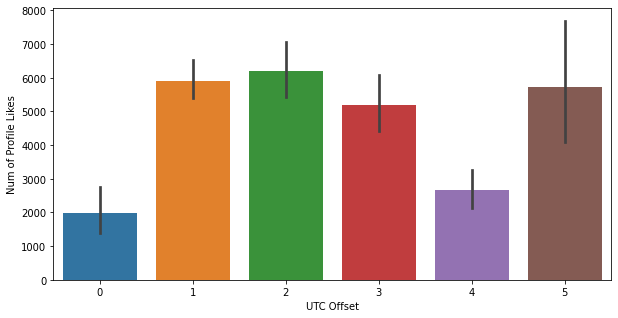

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='UTC Offset', y='Num of Profile Likes', data=df_cleaned);

### Feature 14:URL

In [ ]:
 df_cleaned.loc[df_cleaned['Personal URL'].notnull(),'Personal URL']=1
 df_cleaned.loc[df_cleaned['Personal URL'].isnull(),'Personal URL']=0

 df_cleaned['Personal URL']


0       0
1       0
2       0
3       1
4       1
       ..
7495    0
7496    0
7497    0
7498    0
7499    1
Name: Personal URL, Length: 7500, dtype: object

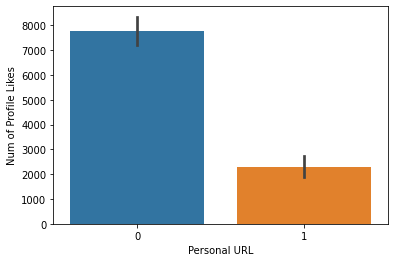

In [ ]:
sns.barplot(x='Personal URL', y='Num of Profile Likes', data=df_cleaned);

In [ ]:
df_cleaned.head()

,Personal URL,Profile Cover Image Status,Profile Verification Status,Is Profile View Size Customized?,UTC Offset,Location Public Visibility,User Language,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Num of Profile Likes,cluster_image,Profile Verification Status_1,Profile Verification Status_2,Profile Verification Status_3,User_Lan_en,User_Lan_es,User_Lan_other,User_Lan_pt,year
0,0,1,1,0,5,1,en,Thu Nov 27 05:24:59 +0000 2008,Sydney,11.469642,8.364042,10.335595,6.773080,1,14.792,0.946277,AL85S14OMDPF01I9.png,2815,2,1,0,0,1,0,0,0,2008
1,0,1,1,0,5,1,en,Fri Jan 15 18:00:46 +0000 2010,NaN,13.834084,5.669881,9.005896,5.673323,4,8.183,2.507825,HI11QOPD7BLJTO7Q.png,1242,3,1,0,0,1,0,0,0,2010
2,0,1,2,0,1,1,en,Fri Oct 02 20:15:06 +0000 2009,Central Time (US & Canada),9.506363,7.537430,8.455105,5.429346,4,31.823,0.452667,JS49LP5P72RI1OQB.png,1559,2,0,1,0,1,0,0,0,2009
3,1,0,1,0,2,1,en,Thu Feb 19 14:37:22 +0000 2009,Eastern Time (US & Canada),12.734254,7.046647,10.882133,8.303009,1,23.052,1.614724,S0GDSC09MACCLBJP.png,6342,2,1,0,0,1,0,0,0,2009
4,1,1,2,0,1,1,en,Tue Mar 31 13:27:52 +0000 2009,Central Time (US & Canada),9.128696,4.543295,8.093157,4.875197,4,8.418,1.593898,CRSEMK4QER6LDJSA.png,1078,1,0,1,0,1,0,0,0,2009


In [ ]:
# test cluster
dummy_Imgcluster = pd.get_dummies(df_cleaned['cluster_image'], prefix='ImgGr') 
df_cleaned = df_cleaned.merge(dummy_Imgcluster, left_index=True, right_index=True) 

In [ ]:
df_cleaned.head()

,Personal URL,Profile Cover Image Status,Profile Verification Status,Is Profile View Size Customized?,UTC Offset,Location Public Visibility,User Language,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Num of Profile Likes,cluster_image,Profile Verification Status_1,Profile Verification Status_2,Profile Verification Status_3,User_Lan_en,User_Lan_es,User_Lan_other,User_Lan_pt,year,ImgGr_1,ImgGr_2,ImgGr_3,ImgGr_4
0,0,1,1,0,5,1,en,Thu Nov 27 05:24:59 +0000 2008,Sydney,11.469642,8.364042,10.335595,6.773080,1,14.792,0.946277,AL85S14OMDPF01I9.png,2815,2,1,0,0,1,0,0,0,2008,0,1,0,0
1,0,1,1,0,5,1,en,Fri Jan 15 18:00:46 +0000 2010,NaN,13.834084,5.669881,9.005896,5.673323,4,8.183,2.507825,HI11QOPD7BLJTO7Q.png,1242,3,1,0,0,1,0,0,0,2010,0,0,1,0
2,0,1,2,0,1,1,en,Fri Oct 02 20:15:06 +0000 2009,Central Time (US & Canada),9.506363,7.537430,8.455105,5.429346,4,31.823,0.452667,JS49LP5P72RI1OQB.png,1559,2,0,1,0,1,0,0,0,2009,0,1,0,0
3,1,0,1,0,2,1,en,Thu Feb 19 14:37:22 +0000 2009,Eastern Time (US & Canada),12.734254,7.046647,10.882133,8.303009,1,23.052,1.614724,S0GDSC09MACCLBJP.png,6342,2,1,0,0,1,0,0,0,2009,0,1,0,0
4,1,1,2,0,1,1,en,Tue Mar 31 13:27:52 +0000 2009,Central Time (US & Canada),9.128696,4.543295,8.093157,4.875197,4,8.418,1.593898,CRSEMK4QER6LDJSA.png,1078,1,0,1,0,1,0,0,0,2009,1,0,0,0


### Pre-Processing

In [ ]:
# Finalizing all the pre-processing steps we have seen above.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

def pre_process(data):

#drop
  toDrop = ['User Name','Profile Text Color', 'Profile Page Color', 'Profile Theme Color','User Time Zone','Location']
  df_clean = data.drop(toDrop,axis=1)


#Impute

  df_clean['Avg Daily Profile Visit Duration in seconds'].fillna(value=df_clean['Avg Daily Profile Visit Duration in seconds'].median(), inplace=True)
  df_clean['Avg Daily Profile Clicks'].fillna(value=df_clean['Avg Daily Profile Clicks'].median(), inplace=True)



  #Grouping Num of Status Updates in 4
  conditions = [
    df_clean['Num of Status Updates'] < 3.568000e+03,
    df_clean['Num of Status Updates'] < 1.040500e+04,
    df_clean['Num of Status Updates'] < 2.778325e+04,
    True
   ]
     
   #average likes
   #1456.850667     1242
   #3231.265067     1559
   #6586.431467     6342
   #10272.168000    1078
     
  outputs = [
      1456, 3231, 6586, 10272
    ]

  df_clean['average likes'] = np.select(conditions, outputs)


  #normalise
  df_clean['Num of Followers']= np.log(1+df_clean['Num of Followers'])
  df_clean['Num of Status Updates']= np.log(1+df_clean['Num of Status Updates'])
  df_clean['Num of People Following']= np.log(1+df_clean['Num of People Following'])
  df_clean['Num of Direct Messages']= np.log(1+df_clean['Num of Direct Messages'])
  df_clean['Avg Daily Profile Clicks']= np.log(1+df_clean['Avg Daily Profile Clicks'])
  df_clean['average likes']= np.log(1+df_clean['average likes'])

 
  #Categorical

  df_clean['Profile Cover Image Status'].fillna(method='ffill', inplace=True)
  df_clean['Profile Cover Image Status'].replace(['Set', 'Not set'], ['1', '0'], inplace=True)

# Tried both Onehot code and Integer encoding no improvement so dropped idea of onehot coding
  #df_clean['Profile Verification Status'].replace(['Verified', 'Not verified','Pending'], ['1', '2','3'], inplace=True)
### pendiente por aplicar
  dummy_PvStatus = pd.get_dummies(df_clean['Profile Verification Status'], prefix='PV_Status') 
  df_clean = df_clean.merge(dummy_PvStatus, left_index=True, right_index=True) 

  dummy_Imgcluster = pd.get_dummies(df_clean['cluster_image'], prefix='ImgGr') 
  df_clean = df_clean.merge(dummy_Imgcluster, left_index=True, right_index=True) 

  df_clean['Is Profile View Size Customized?'].replace([False, True], ['0', '1'], inplace=True)

# Tried both Onehot code and Integer encoding no improvement so dropped idea of onehot coding
  df_clean['Location Public Visibility'].replace(['enabled', 'disabled','??'], ['Enabled', 'Disabled','unknown'], inplace=True)
  #df_clean['Location Public Visibility'].replace(['Enabled', 'Disabled','unknown'], ['1','2','3'], inplace=True)
  dummy_LPvisib = pd.get_dummies(df_clean['Location Public Visibility'], prefix='LP_Visibility') 
  df_clean = df_clean.merge(dummy_LPvisib, left_index=True, right_index=True)

# Tried both Onehot code and Integer encoding no improvement so dropped idea of onehot coding
  df_clean['Profile Category'].replace([' '],['unknown'], inplace=True)
  #df_clean['Profile Category'].replace(['business','celebrity','government','unknown'],['1','2','3','4'], inplace=True)

  dummy_ProfileCat = pd.get_dummies(df_clean['Profile Category'], prefix='ProfileCat') 
  df_clean = df_clean.merge(dummy_ProfileCat, left_index=True, right_index=True)

  #Frequency encoding
  #fe = df_clean.groupby(['User Language']).size()/len(df_clean['User Language'])
  #df_clean.loc[:,'User Language'] = df_clean['User Language'].map(fe)
  #df_clean.loc[~df_clean['User Language'].isin(['en','es','pt','fr','tr']), 'User Language'] = 'other'
  df_clean.loc[~df_clean['User Language'].isin(['en','es','pt']), 'User Language'] = 'other'
  dummy_User_Language = pd.get_dummies(df_clean['User Language'], prefix='User_Lan') 
  df_clean = df_clean.merge(dummy_User_Language, left_index=True, right_index=True)

 
  df_clean['Profile Creation year'] = pd.DatetimeIndex(df_clean['Profile Creation Timestamp']).year
  #ft = df_clean.groupby(['year']).size()/len(df_clean['year'])
  #df_clean.loc[:,'year'] = df_clean['year'].map(ft)

#UTC OFFSET
  #Imputed missing values with FFILL method. Converted seconds in to minutes and bucketed to 5 regions
  df_clean['UTC Offset'].fillna(method='ffill', inplace=True)
  df_clean['UTC Offset']  = df_clean['UTC Offset']/3600
  df_clean['UTC Offset'] = pd.cut(df_clean['UTC Offset'],(-15,-10,-5,0,5,10,15),labels=[0, 1, 2,3,4,5])

  #Personal URL
  #Replaced NON null URL with 1 and Null to 1
  df_clean.loc[df_clean['Personal URL'].notnull(),'Personal URL']=1
  df_clean.loc[df_clean['Personal URL'].isnull(),'Personal URL']=0


  #scaler,
  scaled_features = df_clean.copy()
  # select features to encodee-- modify this one
  #col_names = ['Num of Followers','Num of Status Updates','Num of People Following','Num of Direct Messages',
#'Avg Daily Profile Visit Duration in seconds','Avg Daily Profile Clicks',
#'Profile Cover Image Status',
#'PV_Status_Verified','PV_Status_Not verified','PV_Status_Pending',
#'Is Profile View Size Customized?',
#'LP_Visibility_Enabled','LP_Visibility_Disabled','LP_Visibility_unknown',
#'ProfileCat_business','ProfileCat_celebrity','ProfileCat_government','ProfileCat_unknown',
#'User_Lan_en','User_Lan_es','User_Lan_pt','User_Lan_other',
#'Profile Creation year',
#'UTC Offset',
#'Personal URL',
#]

  # modified by kfn - 12/12/20
  col_names = ['Num of Followers','Num of Status Updates','Num of People Following','Num of Direct Messages',
'Avg Daily Profile Visit Duration in seconds','Avg Daily Profile Clicks', 'average likes',
'Profile Cover Image Status',
'PV_Status_Verified','PV_Status_Not verified','PV_Status_Pending',
'Is Profile View Size Customized?',
'LP_Visibility_Enabled','LP_Visibility_Disabled','LP_Visibility_unknown',
'ProfileCat_business','ProfileCat_celebrity','ProfileCat_government','ProfileCat_unknown',
'User_Lan_en','User_Lan_es','User_Lan_pt','User_Lan_other','ImgGr_1','ImgGr_2','ImgGr_3',
'Profile Creation year',
'UTC Offset',
'Personal URL',
]
    
  features = scaled_features[col_names]
  #scaler = MinMaxScaler().fit(features.values)
  scaler = RobustScaler().fit(features.values)
  features = scaler.transform(features.values)
  
  df_clean[col_names] = features
  return df_clean


### Dropped columns whose correlation is 0.84 and 0.9 ('LP_Visibility_Disabled' and 'PV_Status_Not verified')

In [ ]:
#this is the columns including the clusters
'''cols=['Num of Followers','Num of Status Updates','Num of People Following','Num of Direct Messages',
'Avg Daily Profile Visit Duration in seconds','Avg Daily Profile Clicks',
'Profile Cover Image Status',
'PV_Status_Verified','PV_Status_Not verified','PV_Status_Pending',
'Is Profile View Size Customized?',
'LP_Visibility_Enabled','LP_Visibility_Disabled','LP_Visibility_unknown',
'ProfileCat_business','ProfileCat_celebrity','ProfileCat_government','ProfileCat_unknown',
'User_Lan_en','User_Lan_es','User_Lan_pt','User_Lan_fr','User_Lan_tr','User_Lan_other','ImgGr_1','ImgGr_2','ImgGr_3',
'Profile Creation year',
'UTC Offset',
'Personal URL',
'Num of Profile Likes'
]'''

"cols=['Num of Followers','Num of Status Updates','Num of People Following','Num of Direct Messages',\n'Avg Daily Profile Visit Duration in seconds','Avg Daily Profile Clicks',\n'Profile Cover Image Status',\n'PV_Status_Verified','PV_Status_Not verified','PV_Status_Pending',\n'Is Profile View Size Customized?',\n'LP_Visibility_Enabled','LP_Visibility_Disabled','LP_Visibility_unknown',\n'ProfileCat_business','ProfileCat_celebrity','ProfileCat_government','ProfileCat_unknown',\n'User_Lan_en','User_Lan_es','User_Lan_pt','User_Lan_fr','User_Lan_tr','User_Lan_other','ImgGr_1','ImgGr_2','ImgGr_3','ImgGr_4',\n'Profile Creation year',\n'UTC Offset',\n'Personal URL',\n'Num of Profile Likes'\n]"

In [ ]:
#use this one to try clusters
cols=['Num of Followers','Num of Status Updates','Num of People Following','Num of Direct Messages',
'Avg Daily Profile Visit Duration in seconds','Avg Daily Profile Clicks', 'average likes',
'Profile Cover Image Status',
'PV_Status_Verified','PV_Status_Not verified','PV_Status_Pending',
'Is Profile View Size Customized?',
'LP_Visibility_Enabled','LP_Visibility_Disabled','LP_Visibility_unknown',
'ProfileCat_business','ProfileCat_celebrity','ProfileCat_government','ProfileCat_unknown',
'User_Lan_en','User_Lan_es','User_Lan_pt','User_Lan_other','ImgGr_1','ImgGr_2','ImgGr_3',
'Profile Creation year',
'UTC Offset',
'Personal URL',
'Num of Profile Likes'
]

In [ ]:
cols=['Num of Followers','Num of Status Updates','Num of People Following','Num of Direct Messages',
'Avg Daily Profile Visit Duration in seconds','Avg Daily Profile Clicks', 'average likes',
'Profile Cover Image Status',
'PV_Status_Verified','PV_Status_Not verified','PV_Status_Pending',
'Is Profile View Size Customized?',
'LP_Visibility_Enabled','LP_Visibility_Disabled','LP_Visibility_unknown',
'ProfileCat_business','ProfileCat_celebrity','ProfileCat_government','ProfileCat_unknown',
'User_Lan_en','User_Lan_es','User_Lan_pt','User_Lan_other',
'Profile Creation year',
'UTC Offset',
'Personal URL',
'Num of Profile Likes'
]

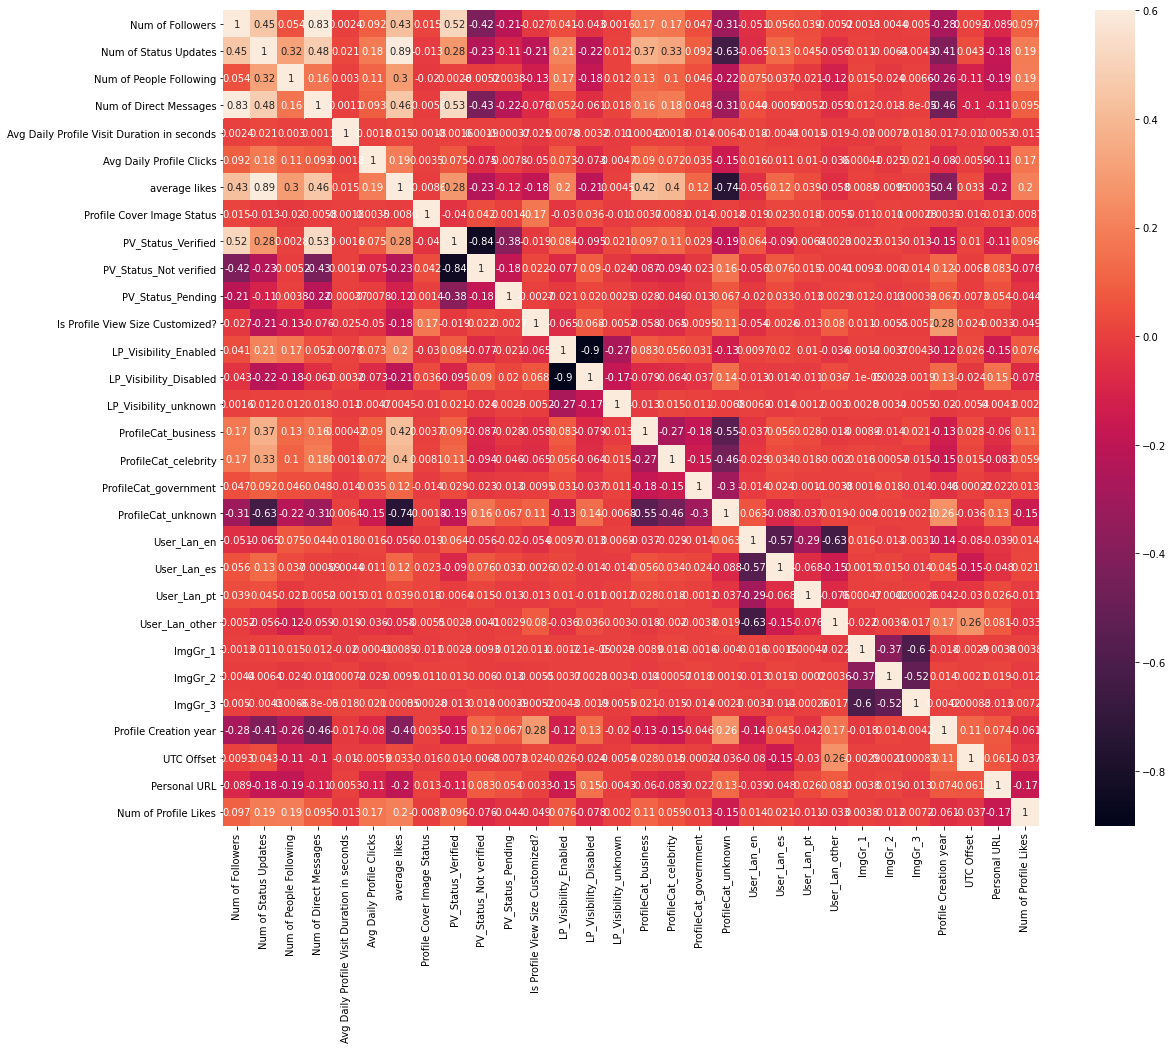

In [ ]:
# viz correlation matrix
df_p = pre_process(pd.read_csv(train_path))
plt.figure(figsize=(20,15))
sns.heatmap(df_p[cols].corr(), vmax=0.6,square=True, annot=True);


In [ ]:
test_path

'df_test_img_canny.csv'

In [ ]:
df_train.head

<bound method NDFrame.head of                     Id  Personal URL  ...  User_Lan_pt Profile Creation year
0     AL85S14OMDPF01I9           0.0  ...          0.0                  -1.0
1     HI11QOPD7BLJTO7Q           0.0  ...          0.0                   0.0
2     JS49LP5P72RI1OQB           0.0  ...          0.0                  -0.5
3     S0GDSC09MACCLBJP           1.0  ...          0.0                  -0.5
4     CRSEMK4QER6LDJSA           1.0  ...          0.0                  -0.5
...                ...           ...  ...          ...                   ...
7495  KP5DR7CTN8CNLG8P           0.0  ...          0.0                   0.5
7496  SGNF9P1P3922T34T           0.0  ...          1.0                   0.5
7497  O00FTLDT6O803LD0           0.0  ...          0.0                  -0.5
7498  9F04JLR9JGT8R3EJ           0.0  ...          1.0                  -0.5
7499  LLKNQ56IFCSSCOT6           1.0  ...          0.0                   0.0

[7500 rows x 37 columns]>

In [ ]:
df_train = pre_process(pd.read_csv(train_path))
df_test = pre_process(pd.read_csv(test_path))

df_train['Num of Profile Likes']= np.log(1+df_train['Num of Profile Likes'])

#modify this one too for clusters
#cols_x = ['Num of Followers','Num of Status Updates','Num of People Following','Num of Direct Messages',
#'Avg Daily Profile Visit Duration in seconds','Avg Daily Profile Clicks',
#'Profile Cover Image Status',
#'PV_Status_Verified','PV_Status_Not verified','PV_Status_Pending',
#'Is Profile View Size Customized?',
#'LP_Visibility_Enabled','LP_Visibility_Disabled','LP_Visibility_unknown',
#'ProfileCat_business','ProfileCat_celebrity','ProfileCat_government','ProfileCat_unknown',
#'User_Lan_en','User_Lan_es','User_Lan_pt','User_Lan_other',
#'Profile Creation year',
#'UTC Offset',
#'Personal URL',
#]

#use this one to try clusters
cols_x=['Num of Followers','Num of Status Updates','Num of People Following','Num of Direct Messages',
'Avg Daily Profile Visit Duration in seconds','Avg Daily Profile Clicks','average likes',
'Profile Cover Image Status',
'PV_Status_Verified','PV_Status_Not verified','PV_Status_Pending',
'Is Profile View Size Customized?',
'LP_Visibility_Enabled','LP_Visibility_Disabled','LP_Visibility_unknown',
'ProfileCat_business','ProfileCat_celebrity','ProfileCat_government','ProfileCat_unknown',
'User_Lan_en','User_Lan_es','User_Lan_pt','User_Lan_other','ImgGr_1','ImgGr_2','ImgGr_3',
'Profile Creation year',
'UTC Offset',
'Personal URL'
]

cols_y = 'Num of Profile Likes'

In [ ]:
df_train
df_test

,Id,Personal URL,Profile Cover Image Status,Profile Verification Status,Is Profile View Size Customized?,UTC Offset,Location Public Visibility,User Language,Profile Creation Timestamp,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,cluster_image,average likes,PV_Status_Not verified,PV_Status_Pending,PV_Status_Verified,ImgGr_1,ImgGr_2,ImgGr_3,LP_Visibility_Disabled,LP_Visibility_Enabled,LP_Visibility_unknown,ProfileCat_business,ProfileCat_celebrity,ProfileCat_government,ProfileCat_unknown,User_Lan_en,User_Lan_es,User_Lan_other,User_Lan_pt,Profile Creation year
0,49I3SOKLI2CMNGP4,0.0,0.0,Not verified,0.0,-0.5,Enabled,en,Mon Jul 20 21:05:24 +0000 2009,-0.483670,0.633127,0.105297,-0.124663,business,-0.686960,0.307412,49I3SOKLI2CMNGP4.png,1,0.000000,1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5
1,727IRIR59A3P88LK,0.0,-1.0,Not verified,0.0,1.0,Enabled,en,Wed Aug 05 22:31:34 +0000 2009,-0.398619,-0.332359,0.054273,0.376551,government,0.077646,0.262897,727IRIR59A3P88LK.png,2,0.000000,1.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.5
2,LN95SD15SRPCEE8F,1.0,0.0,Verified,0.0,-0.5,Enabled,en,Fri Mar 18 18:36:02 +0000 2011,1.497722,-0.147749,-0.055041,1.675488,unknown,0.227086,1.809522,LN95SD15SRPCEE8F.png,1,-0.615692,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5
3,TB11I7F0PN033D4T,0.0,0.0,Verified,0.0,-0.5,unknown,en,Sun Apr 08 05:45:46 +0000 2007,0.067084,0.119544,0.001173,0.525461,celebrity,0.235788,-0.169438,TB11I7F0PN033D4T.png,2,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.5
4,32PSGCK5PATHMR07,1.0,0.0,Not verified,0.0,-0.5,Enabled,en,Mon Jun 04 19:51:04 +0000 2012,-1.389244,0.525943,-1.169518,-1.596830,unknown,-0.383053,0.471584,32PSGCK5PATHMR07.png,3,-1.304648,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,7SDJE48EFRPPNEJK,1.0,0.0,Verified,0.0,-0.5,Disabled,en,Thu Oct 22 15:37:48 +0000 2009,0.778219,0.222759,-0.182722,0.991479,unknown,-0.261670,0.833588,7SDJE48EFRPPNEJK.png,3,-0.615692,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.5
2496,PRT8RDNG6E86518P,0.0,0.0,Not verified,0.0,0.0,Enabled,en,Tue Jul 15 20:30:25 +0000 2008,-0.542154,1.092152,0.251247,0.122467,government,-0.735123,-0.301425,PRT8RDNG6E86518P.png,2,0.000000,1.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0
2497,SRNIBIK27BQ2M3PB,0.0,-1.0,Not verified,0.0,0.0,Enabled,pt,Thu Jul 21 13:38:14 +0000 2011,0.202792,0.200830,0.807818,0.038192,business,-0.036535,1.148902,SRNIBIK27BQ2M3PB.png,1,0.384308,1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.5
2498,6CP232J9R8N84702,0.0,0.0,Not verified,0.0,-0.5,Disabled,en,Thu Apr 02 16:46:07 +0000 2009,-0.791564,0.122801,-0.825355,-0.271239,unknown,0.227011,0.778788,6CP232J9R8N84702.png,3,-1.304648,1.0,0.0,-1.0,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.5


In [ ]:
cols_y 

'Num of Profile Likes'

In [ ]:
cols_x

['Num of Followers',
 'Num of Status Updates',
 'Num of People Following',
 'Num of Direct Messages',
 'Avg Daily Profile Visit Duration in seconds',
 'Avg Daily Profile Clicks',
 'average likes',
 'Profile Cover Image Status',
 'PV_Status_Verified',
 'PV_Status_Not verified',
 'PV_Status_Pending',
 'Is Profile View Size Customized?',
 'LP_Visibility_Enabled',
 'LP_Visibility_Disabled',
 'LP_Visibility_unknown',
 'ProfileCat_business',
 'ProfileCat_celebrity',
 'ProfileCat_government',
 'ProfileCat_unknown',
 'User_Lan_en',
 'User_Lan_es',
 'User_Lan_pt',
 'User_Lan_other',
 'ImgGr_1',
 'ImgGr_2',
 'ImgGr_3',
 'Profile Creation year',
 'UTC Offset',
 'Personal URL']

# Fit Model

#### Train_Test_Split

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import xgboost
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from sklearn.metrics import classification_report


In [ ]:
from sklearn.model_selection import train_test_split

# split dataset to train and test
X_train, X_val, y_train, y_val = train_test_split(df_train[cols_x], df_train[cols_y], 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=8 #  To guarantee that the split will always be the same
                                                    )  



In [ ]:
X_train.head()

,Num of Followers,Num of Status Updates,Num of People Following,Num of Direct Messages,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,average likes,Profile Cover Image Status,PV_Status_Verified,PV_Status_Not verified,PV_Status_Pending,Is Profile View Size Customized?,LP_Visibility_Enabled,LP_Visibility_Disabled,LP_Visibility_unknown,ProfileCat_business,ProfileCat_celebrity,ProfileCat_government,ProfileCat_unknown,User_Lan_en,User_Lan_es,User_Lan_pt,User_Lan_other,ImgGr_1,ImgGr_2,ImgGr_3,Profile Creation year,UTC Offset,Personal URL
2836,-0.707637,-0.907535,-0.442403,-0.643679,0.231244,0.813173,-1.127594,0.0,-1.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.5,0.0
2957,-1.097787,0.146094,0.475232,-0.824527,-1.145283,0.346896,0.348239,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.5,0.0
1373,0.588906,0.088640,0.758440,1.195557,-0.289687,1.214155,0.348239,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.5,-0.5,1.0
1687,-1.570553,-1.401832,-0.838249,-1.241000,0.358915,-1.381377,-1.127594,-1.0,-1.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,-0.5,1.0
7362,-0.069997,0.291214,-1.541838,-0.611843,-0.008491,-0.049676,0.348239,0.0,-1.0,1.0,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.5,0.5,1.0


### Hyperparameters_tuned

### Intitialisation

In [ ]:
result = pd.DataFrame(columns = ("Regressors","Training","Testing"))
Regressor, train_scores, test_scores = [],[],[]

In [ ]:
k_fold = KFold(n_splits=5, shuffle=True,random_state=1)

#### Support Vector Regression

##### Tune parameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

sregressor=SVR()

# How large is this parameter space?
tuned_parameters = [
  {'kernel': ['rbf'],
  'gamma': np.logspace(-1, -2, num=50),
  'C': np.logspace(0, 3, num=50)},
  
  {'kernel': ['linear'],
   'C': np.logspace(0, 3, num=50)},
]

grid_search = RandomizedSearchCV(
    sregressor, tuned_parameters, n_iter=10, cv=k_fold, 
)
grid_search.fit(df_train[cols_x], df_train[cols_y]);
print('Finished!')

Finished!


In [ ]:
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)

Best parameters set found on development set:

{'kernel': 'rbf', 'gamma': 0.011513953993264475, 'C': 19.306977288832496}


Best parameters set found on development set:

{'kernel': 'rbf', 'gamma': 0.011513953993264475, 'C': 19.306977288832496}

In [ ]:
print("Grid scores on development set:")
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Grid scores on development set:

0.527 (+/-0.037) for {'kernel': 'rbf', 'gamma': 0.011513953993264475, 'C': 19.306977288832496}
0.495 (+/-0.038) for {'kernel': 'rbf', 'gamma': 0.07906043210907701, 'C': 12.648552168552959}
0.505 (+/-0.040) for {'kernel': 'rbf', 'gamma': 0.06250551925273973, 'C': 14.563484775012437}
0.518 (+/-0.031) for {'kernel': 'rbf', 'gamma': 0.012648552168552964, 'C': 1.3257113655901092}
0.526 (+/-0.033) for {'kernel': 'rbf', 'gamma': 0.025595479226995357, 'C': 1.3257113655901092}
0.440 (+/-0.033) for {'kernel': 'rbf', 'gamma': 0.09102981779915217, 'C': 29.4705170255181}
0.411 (+/-0.035) for {'kernel': 'rbf', 'gamma': 0.1, 'C': 39.06939937054617}
0.519 (+/-0.045) for {'kernel': 'rbf', 'gamma': 0.02682695795279726, 'C': 33.93221771895328}
0.527 (+/-0.038) for {'kernel': 'rbf', 'gamma': 0.07196856730011521, 'C': 2.6826957952797255}
0.472 (+/-0.033) for {'kernel': 'linear', 'C': 9.54095476349994}


In [ ]:
k_fold = KFold(n_splits=10, shuffle=True,random_state=1)

parameters = {'C':[0.1,0.2,0.5 ,1, 2,3,4,5,6],'gamma': [1,0.01 , 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002,
       0.001,1e-1,1e-2, 1e-3, 1e-6,1e-7,1e-5,'scale']}

svR = SVR(kernel = 'rbf')

clf = GridSearchCV(svR, parameters,cv=k_fold)
clf.fit(df_train[cols_x], df_train[cols_y])

sorted(clf.cv_results_.keys())

KeyboardInterrupt: ignored

In [ ]:
print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:


AttributeError: ignored

In [ ]:
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Grid scores on development set:

0.346 (+/-0.023) for {'C': 0.1, 'gamma': 1}
0.330 (+/-0.026) for {'C': 0.1, 'gamma': 0.01}
0.322 (+/-0.026) for {'C': 0.1, 'gamma': 0.009}
0.313 (+/-0.025) for {'C': 0.1, 'gamma': 0.008}
0.303 (+/-0.025) for {'C': 0.1, 'gamma': 0.007}
0.289 (+/-0.026) for {'C': 0.1, 'gamma': 0.006}
0.273 (+/-0.025) for {'C': 0.1, 'gamma': 0.005}
0.252 (+/-0.025) for {'C': 0.1, 'gamma': 0.004}
0.221 (+/-0.026) for {'C': 0.1, 'gamma': 0.003}
0.175 (+/-0.027) for {'C': 0.1, 'gamma': 0.002}
0.096 (+/-0.031) for {'C': 0.1, 'gamma': 0.001}
0.419 (+/-0.035) for {'C': 0.1, 'gamma': 0.1}
0.330 (+/-0.026) for {'C': 0.1, 'gamma': 0.01}
0.096 (+/-0.031) for {'C': 0.1, 'gamma': 0.001}
-0.047 (+/-0.041) for {'C': 0.1, 'gamma': 1e-06}
-0.047 (+/-0.041) for {'C': 0.1, 'gamma': 1e-07}
-0.045 (+/-0.041) for {'C': 0.1, 'gamma': 1e-05}
0.426 (+/-0.035) for {'C': 0.1, 'gamma': 'scale'}
0.388 (+/-0.022) for {'C': 0.2, 'gamma': 1}
0.372 (+/-0.029) for {'C': 0.2, 'gamma': 0.01}
0.367 (+/-0.029

##### Final SVR Model

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score

Best parameters set found on development set:

{'kernel': 'rbf', 'gamma': 0.011513953993264475, 'C': 19.306977288832496}

In [ ]:
#regressor = SVR(kernel = 'rbf', C=2, gamma= 0.1)
#regressor = SVR(kernel = 'rbf', C=6, gamma= 0.1)
regressor = SVR(kernel = 'rbf', C=19.3069, gamma= 0.0115)
regressor.fit(X_train, y_train)
y_pred=np.exp(regressor.predict(X_val))-1
y_pred = [0 if x<0 else x for x in y_pred]
y_check=np.exp(y_val)-1
print("Test accuracy",regressor.score(X_val, y_val))
print("Train accuracy",regressor.score(X_train, y_train))
print("MSLE",mean_squared_log_error(y_check, y_pred))
print("RMSLE",np.sqrt(mean_squared_log_error(y_check, y_pred)))

Regressor.append("SVR")
train_scores.append(regressor.score(X_train, y_train))
test_scores.append(regressor.score(X_val, y_val))

Test accuracy 0.55218915513973
Train accuracy 0.550562271368082
MSLE 3.0299238663114134
RMSLE 1.740667649584898


Test accuracy 0.5532075938002621
Train accuracy 0.5488491389395513
MSLE 3.023397210631727
RMSLE 1.738791882495351

Test accuracy 0.514173763745049
Train accuracy 0.5120774118647478
MSLE 3.2912145048755197
RMSLE 1.8141704729367414

In [ ]:

scores = cross_val_score(regressor, df_train[cols_x], df_train[cols_y], cv=k_fold)
print("Reg: Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

Reg: Accuracy: 0.5070 (+/- 0.0184)


#### KNN Regressor

##### Fine Tune parameters

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

tuned_parameters = [
  {'n_neighbors': [1,2,4,6,8,10,12,14,16,18,20]},
    {'weights': ['uniform', 'distance']},
]

knn=KNeighborsRegressor()

grid_search = GridSearchCV(
    knn,tuned_parameters,cv=k_fold, 
)
grid_search.fit(df_train[cols_x], df_train[cols_y]);
print('Finished!')


Finished!


In [ ]:
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)

Best parameters set found on development set:

{'n_neighbors': 20}


In [ ]:
print("Grid scores on development set:")
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Grid scores on development set:

0.080 (+/-0.091) for {'n_neighbors': 1}
0.301 (+/-0.055) for {'n_neighbors': 2}
0.404 (+/-0.038) for {'n_neighbors': 4}
0.440 (+/-0.044) for {'n_neighbors': 6}
0.457 (+/-0.052) for {'n_neighbors': 8}
0.465 (+/-0.047) for {'n_neighbors': 10}
0.471 (+/-0.045) for {'n_neighbors': 12}
0.472 (+/-0.045) for {'n_neighbors': 14}
0.472 (+/-0.045) for {'n_neighbors': 16}
0.472 (+/-0.044) for {'n_neighbors': 18}
0.473 (+/-0.039) for {'n_neighbors': 20}
0.425 (+/-0.045) for {'weights': 'uniform'}
0.427 (+/-0.045) for {'weights': 'distance'}


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 20,weights='distance')
knn.fit(X_train, y_train)
y_pred=np.exp(knn.predict(X_val))-1
y_pred = [0 if x<0 else x for x in y_pred]
y_check=np.exp(y_val)-1
print("Test accuracy",knn.score(X_val, y_val))
print("Train accuracy",knn.score(X_train, y_train))
print("MSLE",mean_squared_log_error(y_check, y_pred))
print("RMSLE",np.sqrt(mean_squared_log_error(y_check, y_pred)))

Regressor.append("KNN")
train_scores.append(knn.score(X_train, y_train))
test_scores.append(knn.score(X_val, y_val))

Test accuracy 0.4946416907598254
Train accuracy 1.0
MSLE 3.4235339168833963
RMSLE 1.8502794158946363


#### Linear Regressor

In [ ]:
from sklearn.linear_model import LinearRegression
lregressor = LinearRegression()

scores = cross_val_score(lregressor , df_train[cols_x], df_train[cols_y], cv=k_fold)
print("Reg: Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))
print(scores)

Reg: Accuracy: 0.4845 (+/- 0.0159)
[0.49508867 0.48043326 0.49180792 0.49978786 0.45543976]


In [ ]:
lregressor.fit(X_train, y_train)
y_pred=np.exp(lregressor.predict(X_val))-1
y_pred = [0 if x<0 else x for x in y_pred]
y_check=np.exp(y_val)-1
print("Test accuracy",lregressor.score(X_val, y_val))
print("Train accuracy",lregressor.score(X_train, y_train))
print("MSLE",mean_squared_log_error(y_check, y_pred))
print("RMSLE",np.sqrt(mean_squared_log_error(y_check, y_pred)))

Regressor.append("Linear Regression")
train_scores.append(lregressor.score(X_train, y_train))
test_scores.append(lregressor.score(X_val, y_val))


Test accuracy 0.49564598755809697
Train accuracy 0.48691504504960087
MSLE 3.416730339919025
RMSLE 1.848439974659449


#### ADA boost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adareg=AdaBoostRegressor(random_state=0, n_estimators=100)
scores = cross_val_score(adareg , df_train[cols_x], df_train[cols_y], cv=k_fold)
print("Reg: Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))
print(scores)

Reg: Accuracy: 0.3256 (+/- 0.0555)
[0.30031258 0.3731664  0.25338668 0.29555465 0.40541363]


####XGBoost

In [ ]:
import xgboost

In [ ]:
parameters_for_testing = {
    'colsample_bytree':[0.4],#[0.4,0.6,0.8],
    'gamma':[0.3,0.5,1],#[0,0.03,0.1,0.3],
    'min_child_weight':[1.5],#[1.5,6,10],
    'learning_rate':[0.1,0.01,0.001],#[0.1,0.07],
    'max_depth':[3],#[3,5],
    'n_estimators':[10000],
    'reg_alpha':[0.6, 0.75, 0.8],#[1e-5, 1e-2,  0.75],
    'reg_lambda':[0.3, 0.45,0.6],#[1e-5, 1e-2, 0.45],
    'subsample':[0.6]#[0.6,0.95]  
}



In [ ]:
k_fold = KFold(n_splits=5, shuffle=True,random_state=1)

In [ ]:
i

In [ ]:
# dont run -- it does CV and takes 2h
xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0.3,#0                 
                 learning_rate=0.001,#0.001,#0.01,#0.07
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42,
                 early_stopping_rounds=5)
gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, cv=k_fold, verbose=10)
gsearch1.fit(X_train,y_train)

print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:  3.9min
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:  6.0min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:  8.1min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 10.2min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 14.4min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed: 18.6min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed: 22.7min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed: 26.9min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed: 31.1min
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed: 35.4min
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed: 41.7min
[Parallel(n_jobs=6)]: Done 133 tasks      | elapsed: 48.0min
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed: 54.2min
[Parallel(n_jobs=6)]: Done 169 tasks      | elapsed: 60.5min
[Parallel(

[18:11:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
best params
{'colsample_bytree': 0.4, 'gamma': 0.3, 'learning_rate': 0.001, 'max_depth': 3, 'min_child_weight': 1.5, 'n_estimators': 10000, 'reg_alpha': 0.8, 'reg_lambda': 0.6, 'subsample': 0.6}
best score
0.5400626062840671


In [ ]:
#only run if CV above is ran
#print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)
#best params
#{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'min_child_weight': 1.5, 'n_estimators': 10000, 'reg_alpha': 0.01, 'reg_lambda': 0.01, 'subsample': 0.6}
#best score
#0.5442454931236094

#after running on 8/dec/2020
#best params
#{'colsample_bytree': 0.4, 'gamma': 1, 'learning_rate': 0.001, 'max_depth': 3, 'min_child_weight': 1.5, 'n_estimators': 10000, 'reg_alpha': 0.8, 'reg_lambda': 0.6, 'subsample': 0.6}
#best score
#0.539487363773607

#after runnin on 12/dec/2020
#best params
#{'colsample_bytree': 0.4, 'gamma': 0.5, 'learning_rate': 0.001, 'max_depth': 3, 'min_child_weight': 1.5, 'n_estimators': 10000, 'reg_alpha': 0.75, 'reg_lambda': 0.6, 'subsample': 0.6}
#best score
#0.5390795904921728

#best params ran on 13/dec/2020
#{'colsample_bytree': 0.4, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1.5, 'n_estimators': 10000, 'reg_alpha': 0.6, 'reg_lambda': 0.6, 'subsample': 0.6}
#best score
#0.9986739246876308

#best params
#{'colsample_bytree': 0.4, 'gamma': 0.3, 'learning_rate': 0.001, 'max_depth': 3, 'min_child_weight': 1.5, 'n_estimators': 10000, 'reg_alpha': 0.8, 'reg_lambda': 0.6, 'subsample': 0.6}
#best score
#0.539796640954775

#best params
#{'colsample_bytree': 0.4, 'gamma': 0.3, 'learning_rate': 0.001, 'max_depth': 3, 'min_child_weight': 1.5, 'n_estimators': 10000, 'reg_alpha': 0.8, 'reg_lambda': 0.6, 'subsample': 0.6}
#best score
#0.5400626062840671


best params
{'colsample_bytree': 0.4, 'gamma': 0.3, 'learning_rate': 0.001, 'max_depth': 3, 'min_child_weight': 1.5, 'n_estimators': 10000, 'reg_alpha': 0.8, 'reg_lambda': 0.6, 'subsample': 0.6}
best score
0.5400626062840671


In [ ]:
#final model
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0.4, #0.3,              
                 learning_rate=0.001, #0.001
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.8,#0.75,-- modify
                 reg_lambda=0.6,#0.45,--
                 subsample=0.6,
                 seed=42,
                 #alpha=0.5,
                 early_stopping_rounds=5)
best_xgb_model.fit(X_train,y_train)

[21:33:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, early_stopping_rounds=5,
             gamma=0.4, importance_type='gain', learning_rate=0.001,
             max_delta_step=0, max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.8, reg_lambda=0.6, scale_pos_weight=1,
             seed=42, silent=None, subsample=0.6, verbosity=1)

In [ ]:
y_pred=np.exp(best_xgb_model.predict(X_val))-1
y_pred = [0 if x<0 else x for x in y_pred]
y_check=np.exp(y_val)-1

In [ ]:
print("Test accuracy",best_xgb_model.score(X_val, y_val))
print("Train accuracy", best_xgb_model.score(X_train, y_train))
print("MSLE",mean_squared_log_error(y_check, y_pred))
print("RMSLE",np.sqrt(mean_squared_log_error(y_check, y_pred)))


#Regressor.append("XGboost")
#train_scores.append(best_xgb_model.score(X_train, y_train))
#test_scores.append(best_xgb_model.score(X_val, y_val))

Test accuracy 0.5615516235441462
Train accuracy 0.5949767017421027
MSLE 2.9694861946366085
RMSLE 1.723219717458168


Test accuracy 0.5622469142860207
Train accuracy 0.5951968398717777
MSLE 2.964755888753253
RMSLE 1.7218466507657566

13/Dec/2020
Test accuracy 0.9985182020858346
Train accuracy 0.9990154958483884
MSLE 0.009725645995239823
RMSLE 0.09861868988807254

Test accuracy 0.562548055740731
Train accuracy 0.595486857609623
MSLE 2.962540505243258
RMSLE 1.7212032143948774

In [ ]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(best_xgb_model, df_train[cols], df_train[cols_y], cv=k_fold)
print("Reg: Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

[18:55:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:56:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Reg: Accuracy: 0.5448 (+/- 0.0175)


Reg: Accuracy: 0.9984 (+/- 0.0002)

[0.01867895 0.05801621 0.07192184 0.01879198 0.01467539 0.02541265
 0.01066281 0.02797565 0.01754101 0.00950377 0.02063779 0.06295362
 0.07780584 0.00567292 0.00682528 0.0066307  0.0068053  0.05525987
 0.01307599 0.00818188 0.01262561 0.02272114 0.00592799 0.00454118
 0.00601658 0.0128501  0.0220578  0.37623018]


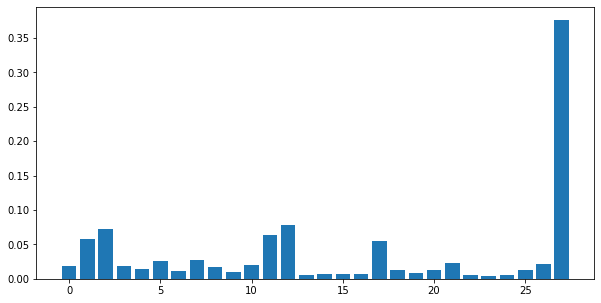

In [ ]:
# feature importance
plt.figure(figsize=(10,5))
print(best_xgb_model.feature_importances_)
# plot
plt.bar(range(len(best_xgb_model.feature_importances_)), best_xgb_model.feature_importances_)
plt.show();

<Figure size 3600x2880 with 0 Axes>

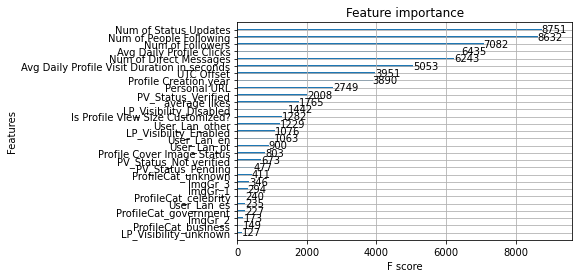

In [ ]:
from xgboost import plot_importance
# plot feature importance
plt.figure(figsize=(50,40))
plot_importance(best_xgb_model)
plt.show();

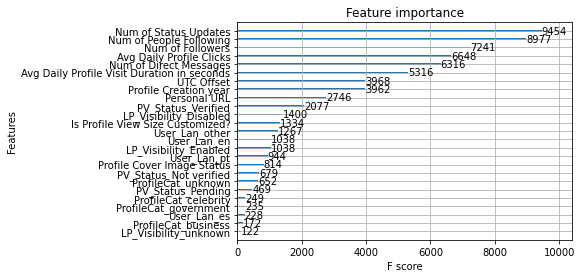

#### LightGBM

In [ ]:
import lightgbm as lgb

In [ ]:
#param_grid = {
#    'num_leaves': [31, 127],
#    'reg_alpha': [0.1, 0.5],
#    'min_data_in_leaf': [30, 50, 100, 300, 400],
#    'lambda_l1': [0, 1, 1.5],
#    'lambda_l2': [0, 1]
#    }

In [ ]:
parameters_for_testing_lgb= {
    'learning_rate':[0.01,0.001],
    'feature_fraction': [0.5,0.6, 0.7],#0.6,#0.9,
    'bagging_fraction': [0.5, 0.6, 0.75,0.8],#0.7,
    'num_leaves': [128, 200],
    'reg_alpha': [1,3,5,10,15],
    'min_data_in_leaf': [30, 50, 100],
    'max_bin': [300, 400, 500, 700],
    'reg_alpha':[1,5,10,15],
     'seed':[42]
    }

In [ ]:
# dont run only if CV wanted
lgb_estimator= lgb.LGBMRegressor(boosting_type='gbdt',  objective='regression', learning_rate=0.01, metric='mse')

In [ ]:
#only if cv
gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=parameters_for_testing_lgb, cv=k_fold)
lgb_model = gsearch.fit(X=X_train, y=y_train)


In [ ]:
print('best params')
print (lgb_model.best_params_)
print('best score')
print (lgb_model.best_score_)

best params


NameError: ignored

#####2nd try
best params
{'bagging_fraction': 0.5, 'feature_fraction': 0.7, 'learning_rate': 0.01, 'max_bin': 700, 'min_data_in_leaf': 30, 'num_leaves': 128, 'reg_alpha': 1, 'seed': 42}
best score
0.42286016491256273
# 1st try
best params
{'bagging_fraction': 0.6, 'feature_fraction': 0.6, 'learning_rate': 0.01, 'min_data_in_leaf': 50, 'num_leaves': 128, 'reg_alpha': 0.1, 'seed': 42}
best score
0.3991756418921247

In [ ]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',#'dart',#'gbdt',
    'objective': 'regression',
    'metric': ['mae', 'mse'],
    'learning_rate': 0.001,#0.01,#0.005,
    'feature_fraction': 0.6,#0.5,#0.6,#0.9,-- modify 0,5
    'bagging_fraction': 0.6,#0.75,#0.7,-- modify 0.75
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 6,#6,#8,
    "num_leaves": 128,  
    "max_bin": 400,#700,#512,
    "num_iterations": 100000,
    "n_estimators": 1000,
    "seed":42,
    'min_data_in_leaf':50,#30
    'reg_alpha': 10#10#5#2
}

In [ ]:
#final model without cv
best_gbm = lgb.LGBMRegressor(**hyper_params)

In [ ]:
#best_gbm = lgb.cv(**hyper_params, nfold=10, stratified=False)

TypeError: ignored

In [ ]:
best_gbm.fit(X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='l1',
        early_stopping_rounds=1000)#1000)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Streaming output truncated to the last 5000 lines.
[4173]	valid_0's l1: 1.29734	valid_0's l1: 1.29734	valid_0's l2: 3.01876
[4174]	valid_0's l1: 1.29732	valid_0's l1: 1.29732	valid_0's l2: 3.01868
[4175]	valid_0's l1: 1.29731	valid_0's l1: 1.29731	valid_0's l2: 3.01861
[4176]	valid_0's l1: 1.2973	valid_0's l1: 1.2973	valid_0's l2: 3.01855
[4177]	valid_0's l1: 1.29728	valid_0's l1: 1.29728	valid_0's l2: 3.01844
[4178]	valid_0's l1: 1.29726	valid_0's l1: 1.29726	valid_0's l2: 3.01834
[4179]	valid_0's l1: 1.29725	valid_0's l1: 1.29725	valid_0's l2: 3.01825
[4180]	valid_0's l1: 1.29723	valid_0's l1: 1.29723	valid_0's l2: 3.01813
[4181]	valid_0's l1: 1.29722	valid_0's l1: 1.29722	valid_0's l2: 3.01808
[4182]	valid_0's l1: 1.29721	valid_0's l1: 1.29721	valid_0's l2: 3.01797
[4183]	valid_0's l1: 1.29719	valid_0's l1: 1.29719	valid_0's l2: 3.01792
[4184]	valid_0's l1: 1.29719	valid_0's l1: 1.29719	valid_0's l2: 3.01786
[4185]	valid_0's l1: 1.29718	valid_0's l1: 1.29718	valid_0's l2: 3.01782
[4

LGBMRegressor(bagging_fraction=0.6, bagging_freq=10, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
              importance_type='split', learning_rate=0.001, max_bin=400,
              max_depth=6, metric=['mae', 'mse'], min_child_samples=20,
              min_child_weight=0.001, min_data_in_leaf=50, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_iterations=100000,
              num_leaves=128, objective='regression', random_state=None,
              reg_alpha=10, reg_lambda=0.0, seed=42, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, task='train',
              verbose=0)

In [ ]:
#calculate error
y_pred = best_gbm.predict(X_val, num_iteration=best_gbm.best_iteration_)
y_pred=np.exp(y_pred)-1
y_pred = [0 if x<0 else x for x in y_pred]
y_check=np.exp(y_val)-1

In [ ]:
print("Test accuracy",best_gbm.score(X_val, y_val))
print("Train accuracy", best_gbm.score(X_train, y_train))
print("MSLE",mean_squared_log_error(y_check, y_pred))
print("RMSLE",np.sqrt(mean_squared_log_error(y_check, y_pred)))


Regressor.append("LightGBM")
train_scores.append(best_gbm.score(X_train, y_train))
test_scores.append(best_gbm.score(X_val, y_val))

Test accuracy 0.565700729160473
Train accuracy 0.628297971400228
MSLE 2.9421467038552644
RMSLE 1.7152686972761044


Test accuracy 0.5660360506389159
Train accuracy 0.629852586401539
MSLE 2.9398750790822694
RMSLE 1.7146063918819006

In [ ]:
from sklearn.model_selection import cross_val_score
# cross-validation
scores = cross_val_score(best_gbm, df_train[cols_x], df_train[cols_y], cv=k_fold)
print("Reg: Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


KeyboardInterrupt: ignored

default lightgbm

In [ ]:
lgb_default= lgb.LGBMRegressor(objective='regression')

In [ ]:
lgb_default.fit(X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='l1')#1000)

[1]	valid_0's l1: 1.94117	valid_0's l2: 6.15416
[2]	valid_0's l1: 1.84328	valid_0's l2: 5.64885
[3]	valid_0's l1: 1.7577	valid_0's l2: 5.22816
[4]	valid_0's l1: 1.68624	valid_0's l2: 4.884
[5]	valid_0's l1: 1.62728	valid_0's l2: 4.60415
[6]	valid_0's l1: 1.57872	valid_0's l2: 4.37102
[7]	valid_0's l1: 1.54042	valid_0's l2: 4.18351
[8]	valid_0's l1: 1.50565	valid_0's l2: 4.01799
[9]	valid_0's l1: 1.47562	valid_0's l2: 3.87404
[10]	valid_0's l1: 1.4508	valid_0's l2: 3.76387
[11]	valid_0's l1: 1.42861	valid_0's l2: 3.66222
[12]	valid_0's l1: 1.41281	valid_0's l2: 3.59158
[13]	valid_0's l1: 1.39718	valid_0's l2: 3.51767
[14]	valid_0's l1: 1.38168	valid_0's l2: 3.45501
[15]	valid_0's l1: 1.36962	valid_0's l2: 3.39816
[16]	valid_0's l1: 1.35993	valid_0's l2: 3.35007
[17]	valid_0's l1: 1.34998	valid_0's l2: 3.30797
[18]	valid_0's l1: 1.34226	valid_0's l2: 3.27876
[19]	valid_0's l1: 1.33644	valid_0's l2: 3.25235
[20]	valid_0's l1: 1.32893	valid_0's l2: 3.21565
[21]	valid_0's l1: 1.32342	valid_

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [ ]:
#calculate error
y_pred = lgb_default.predict(X_val, num_iteration=lgb_default.best_iteration_)
y_pred=np.exp(y_pred)-1
y_pred = [0 if x<0 else x for x in y_pred]
y_check=np.exp(y_val)-1

In [ ]:
print("Test accuracy",lgb_default.score(X_val, y_val))
print("Train accuracy", lgb_default.score(X_train, y_train))
print("MSLE",mean_squared_log_error(y_check, y_pred))
print("RMSLE",np.sqrt(mean_squared_log_error(y_check, y_pred)))

Test accuracy 0.5536497771920659
Train accuracy 0.7483784372856369
MSLE 3.0228750264019935
RMSLE 1.7386417188144294


# ANN

In [ ]:
# Creating a Neural Network Model
#submission 6_MG
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam, SGD,RMSprop, Nadam
import keras.backend as K
from sklearn import metrics

In [ ]:
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)

In [ ]:
X_train.shape

(6000, 28)

In [ ]:
# having 14 neuron is based on the number of available features
K.clear_session()
model = Sequential()
model.add(Dense(4, input_dim=23,activation='relu'))
#model.add(Dense(4,activation='relu'))
#model.add(Dense(4,activation='relu'))
#model.add(Dense(32,activation='relu'))
#model.add(Dense(16,activation='relu'))
#model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1, activation=None))
model.compile(optimizer=Adam(lr=1e-4, decay=1e-4 / 200),loss='mean_squared_error',metrics=['accuracy', 'mean_squared_error'])#Adam(lr=0.01)

In [ ]:
model.fit(x=X_train.values,y=y_train.values,
          validation_split=0.1,
          batch_size=16,epochs=1000)#128 10000 #32
model.summary()

Epoch 1/1000


ValueError: ignored

In [ ]:
y_pred=np.exp( model.predict(X_val))-1
y_pred = [0 if x<0 else x for x in y_pred]
y_check=np.exp(y_val)-1

ValueError: ignored

In [ ]:
print("Test accuracy",model.evaluate(X_val, y_val))
print("Train accuracy", model.evaluate(X_train, y_train))
print("RSME",mean_squared_log_error(y_check, y_pred))

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_check, y_pred))  
print('MSE:', metrics.mean_squared_error(y_check, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_check, y_pred)))
print("RMSLE",np.sqrt(metrics.mean_squared_log_error(y_check, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_check,y_pred))
print('VarScore:',metrics.explained_variance_score(y_check,y_pred))
# Visualizing Our predictions
#fig = plt.figure(figsize=(10,5))
#plt.scatter(y_test,y_pred)
# Perfect predictions
#plt.plot(y_test,y_test,'r')

##Results

In [ ]:
# we shouldnt pick based on the cv?
for i,text in enumerate(Regressor):
    result.loc[i+1] = [text,np.around(train_scores[i]*100, decimals = 1),np.around(test_scores[i]*100, decimals=1)]
result

,Regressors,Training,Testing
1,SVR,59.9,55.7
2,KNN,100.0,49.5
3,Linear Regression,48.7,49.6
4,XGboost,59.4,55.9


###Ensemble method with Crossvalidation

##### Ensemble1

In [ ]:
##### Trying to improve with the ensemble of all predictors
from sklearn.ensemble import VotingRegressor

Reg_vote1 = VotingRegressor(
    estimators=[
        ('knn', knn), # KNN
        ('svm', regressor), # SVM
        ('lr', regressor), # Linear regressor
          ])
Reg_vote1.fit(X_train, y_train)
Reg_vote1.score(X_val, y_val)

0.5507573152489575

In [ ]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(Reg_vote1, df_train[cols_x], df_train[cols_y], cv=k_fold)
print("Reg: Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

Reg: Accuracy: 0.5272 (+/- 0.0180)


##### Ensemble2

In [ ]:

Reg_vote2 = VotingRegressor(
    estimators=[
        ('knn', knn), # KNN
        ('svm', regressor), # SVM
        ('lr', regressor), 
        ('best_xgb_model', best_xgb_model), #  XGB_model# Linear regressor
          ])
Reg_vote2.fit(X_train, y_train)
Reg_vote2.score(X_val, y_val)

[22:56:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.5587396446895474

In [ ]:
scores = cross_val_score(Reg_vote2, df_train[cols_x], df_train[cols_y], cv=k_fold)
print("Reg: Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

[22:59:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:00:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:00:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:01:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:01:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Reg: Accuracy: 0.5375 (+/- 0.0176)


##### Ensemble3

In [ ]:
##### Trying to improve with the ensemble of all predictors
from sklearn.ensemble import VotingRegressor

Reg_vote = VotingRegressor(
    estimators=[
        ('svm', regressor), # SVM
        ('best_xgb_model', best_xgb_model), #  XGB_model
        ])
Reg_vote.fit(X_train, y_train)
Reg_vote.score(X_val, y_val)

[21:39:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.5636433855495073

In [ ]:
##### KFN XGB MODEL
from sklearn.ensemble import VotingRegressor

Reg_vote = VotingRegressor(
    estimators=[
        ('svm', regressor), # SVM
        #('best_xgb_model', best_xgb_model), #  XGB_model
        ])
Reg_vote.fit(X_train, y_train)
Reg_vote.score(X_val, y_val)

0.5399474987691103

In [ ]:
k_fold

KFold(n_splits=5, random_state=1, shuffle=True)

In [ ]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(Reg_vote, df_train[cols], df_train[cols_y], cv=k_fold)
print("Reg: Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))




[15:18:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: ignored

In [ ]:
Reg_vote.fit(df_train[cols_x], df_train[cols_y])
y_pred=np.exp(Reg_vote.predict(X_val))-1
y_pred = [0 if x<0 else x for x in y_pred]
y_check=np.exp(y_val)-1
print("Test accuracy",Reg_vote.score(X_val, y_val))
print("Train accuracy",Reg_vote.score(X_train, y_train))
print("MSLE",mean_squared_log_error(y_check, y_pred))
print("RMSLE",np.sqrt(mean_squared_log_error(y_check, y_pred)))

[21:41:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test accuracy 0.598854552818153
Train accuracy 0.5758867438582229
MSLE 2.7175380105840787
RMSLE 1.6484956810935474


Test accuracy 0.583163758409969
Train accuracy 0.5639731348223018
MSLE 2.8238439633362336
RMSLE 1.6804296960409364

Test accuracy 0.6215091653512868
Train accuracy 0.6001106955790021
MSLE 2.5639464584470097
RMSLE 1.601232793333627

# ensemble 4

In [ ]:
##### Trying to improve with the ensemble of all predictors
from sklearn.ensemble import VotingRegressor

Reg_vote = VotingRegressor(
    estimators=[
        ('svm', regressor), # SVM
        ('best_gbm', best_gbm), #  light
        ])
Reg_vote.fit(X_train, y_train)
Reg_vote.score(X_val, y_val)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


0.5466327092799523

In [ ]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(Reg_vote, df_train[cols_x], df_train[cols_y], cv=k_fold)
print("Reg: Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n

Reg: Accuracy: 0.5296 (+/- 0.0167)


In [ ]:
Reg_vote.fit(df_train[cols_x], df_train[cols_y])
y_pred=np.exp(Reg_vote.predict(X_val))-1
y_pred = [0 if x<0 else x for x in y_pred]
y_check=np.exp(y_val)-1
print("Test accuracy",Reg_vote.score(X_val, y_val))
print("Train accuracy",Reg_vote.score(X_train, y_train))
print("MSLE",mean_squared_log_error(y_check, y_pred))
print("RMSLE",np.sqrt(mean_squared_log_error(y_check, y_pred)))

[21:42:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test accuracy 0.598854552818153
Train accuracy 0.5758867438582229
MSLE 2.7175380105840787
RMSLE 1.6484956810935474


In [ ]:
#predict test dataset
y_test_pred=np.exp(Reg_vote.predict(df_test[cols_x]))-1
y_test_pred = [0 if x<0 else x for x in y_test_pred]

ensemble 5

In [ ]:
##### Trying to improve with the ensemble of all predictors
from sklearn.ensemble import VotingRegressor

Reg_vote = VotingRegressor(
    estimators=[
        ('best_xgb_model', best_xgb_model), #  XGB_model
        ('best_gbm', best_gbm), #  light
        ])
Reg_vote.fit(X_train, y_train)
Reg_vote.score(X_val, y_val)

[21:15:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


0.5572869891868376

In [ ]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(Reg_vote, df_train[cols_x], df_train[cols_y], cv=k_fold)
print("Reg: Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

[21:25:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[21:28:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[21:32:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[21:35:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[21:38:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Reg: Accuracy: 0.5397 (+/- 0.0186)


In [ ]:
Reg_vote.fit(df_train[cols_x], df_train[cols_y])
y_pred=np.exp(Reg_vote.predict(X_val))-1
y_pred = [0 if x<0 else x for x in y_pred]
y_check=np.exp(y_val)-1
print("Test accuracy",Reg_vote.score(X_val, y_val))
print("Train accuracy",Reg_vote.score(X_train, y_train))
print("MSLE",mean_squared_log_error(y_check, y_pred))
print("RMSLE",np.sqrt(mean_squared_log_error(y_check, y_pred)))

[21:19:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Test accuracy 0.758033137610341
Train accuracy 0.7487526484257886
MSLE 1.6388318958306132
RMSLE 1.280168698192005


In [ ]:
df_train[cols_x]

,Num of Followers,Num of Status Updates,Num of People Following,Num of Direct Messages,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Cover Image Status,PV_Status_Verified,PV_Status_Not verified,PV_Status_Pending,Is Profile View Size Customized?,LP_Visibility_Enabled,LP_Visibility_Disabled,LP_Visibility_unknown,ProfileCat_business,ProfileCat_celebrity,ProfileCat_government,ProfileCat_unknown,User_Lan_en,User_Lan_es,User_Lan_pt,User_Lan_other,Profile Creation year,UTC Offset,Personal URL
0,0.578993,0.647729,0.605310,0.451868,0.298960,0.296515,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.181818,1.0,0.0
1,0.720450,0.558407,0.410332,0.378497,0.163061,0.788159,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.363636,1.0,0.0
2,0.461537,0.521408,0.545488,0.362220,0.649161,0.141106,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.272727,0.2,0.0
3,0.654651,0.684443,0.509969,0.553938,0.468807,0.506972,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.272727,0.4,1.0
4,0.438943,0.497094,0.328800,0.325250,0.167894,0.500415,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.272727,0.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.414128,0.416518,0.314363,0.269733,0.504585,0.694214,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.454545,0.2,0.0
7496,0.643222,0.620860,0.764315,0.343803,0.529548,0.199940,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.454545,0.4,0.0
7497,0.490033,0.474831,0.283115,0.373993,0.303853,0.426005,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.272727,0.6,0.0
7498,0.574615,0.706436,0.401589,0.390239,0.240480,0.320000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.272727,0.4,0.0


In [ ]:
df_test[cols_x].head()

,Num of Followers,Num of Status Updates,Num of People Following,Num of Direct Messages,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Cover Image Status,PV_Status_Verified,PV_Status_Not verified,PV_Status_Pending,Is Profile View Size Customized?,LP_Visibility_Enabled,LP_Visibility_Disabled,LP_Visibility_unknown,ProfileCat_business,ProfileCat_celebrity,ProfileCat_government,ProfileCat_unknown,User_Lan_en,User_Lan_es,User_Lan_pt,User_Lan_other,Profile Creation year,UTC Offset,Personal URL
0,0.540512,0.588290,0.545216,0.521849,0.283186,0.457916,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.181818,0.2,0.0
1,0.560236,0.581153,0.395950,0.636069,0.494910,0.447256,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.181818,0.8,0.0
2,1.000000,0.565862,0.424491,0.932082,0.536291,0.817624,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.363636,0.2,1.0
3,0.668233,0.573725,0.465815,0.670004,0.538701,0.343725,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.2,0.0
4,0.330508,0.409972,0.528645,0.186359,0.367340,0.497230,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.454545,0.2,1.0


In [ ]:
#predict test dataset
y_test_pred=np.exp(Reg_vote.predict(df_test[cols_x]))-1
y_test_pred = [0 if x<0 else x for x in y_test_pred]

#Fitting Ensemble 3 Since CV score is Maximum

In [ ]:
Reg_vote.fit(df_train[cols_x], df_train[cols_y])
y_test_pred=np.exp(Reg_vote.predict(df_test[cols_x]))-1
y_test_pred = [0 if x<0 else x for x in y_test_pred]

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


ensemble 6

In [ ]:
##### Trying to improve with the ensemble of all predictors
from sklearn.ensemble import VotingRegressor

Reg_vote = VotingRegressor(
    estimators=[
        ('svm', regressor), # SVM
        ('best_xgb_model', best_xgb_model), #  XGB_model
        ('best_gbm', best_gbm), #  light
        ])
Reg_vote.fit(X_train, y_train)
Reg_vote.score(X_val, y_val)

[22:12:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


0.5573662424018655

In [ ]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(Reg_vote, df_train[cols_x], df_train[cols_y], cv=k_fold)
print("Reg: Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

[22:15:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[22:18:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[22:21:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[22:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[22:28:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Reg: Accuracy: 0.5408 (+/- 0.0168)


In [ ]:
Reg_vote.fit(df_train[cols], df_train[cols_y])
y_pred=np.exp(Reg_vote.predict(X_val))-1
y_pred = [0 if x<0 else x for x in y_pred]
y_check=np.exp(y_val)-1
print("Test accuracy",Reg_vote.score(X_val, y_val))
print("Train accuracy",Reg_vote.score(X_train, y_train))
print("MSLE",mean_squared_log_error(y_check, y_pred))
print("RMSLE",np.sqrt(mean_squared_log_error(y_check, y_pred)))

KeyError: ignored

Test accuracy 0.9990218338962604
Train accuracy 0.9989335490086622
MSLE 0.006389253287314375
RMSLE 0.07993280482576834

In [ ]:
#predict test dataset
y_test_pred=np.exp(Reg_vote.predict(df_test[cols_x]))-1
y_test_pred = [0 if x<0 else x for x in y_test_pred]

#**Submission File**

In [ ]:

dummy = pd.DataFrame()
dummy["Id"] = df_test["Id"]
dummy["Predicted"]=np.array(y_test_pred,dtype=int)
dummy.to_csv("/content/submission_27_Reset.csv", sep=',' ,index=False)



In [ ]:
# Not mandatory to use
from sklearn.utils import resample
num_iterations = 400
error=[]
score=[]

# Bootstrapping loop
for i in range(0, num_iterations):

    X_samples, y_samples = resample(X_train,  y_train, random_state=i,)
    
    Reg_vote.fit(X_samples, y_samples)
    y_pred=np.exp(Reg_vote.predict(X_val))-1
    y_pred = [0 if x<0 else x for x in y_pred]
    y_check=np.exp(y_val)-1
    error.append(np.sqrt(mean_squared_log_error(y_check, y_pred)))
    score.append(Reg_vote.score(X_val, y_val))

confidence_percentage = 95

CI_Lower_error=np.percentile(error,2.5)
CI_Upper_error=np.percentile(error,97.5)


In [ ]:
confidence_percentage = 95

CI_Lower_error=np.percentile(error,2.5)
CI_Upper_error=np.percentile(error,97.5)

print('{:d}% Confidence Interval of Error = [{:.2f},{:.2f}]'.format(int(confidence_percentage), CI_Lower_error, CI_Upper_error))


95% Confidence Interval of Error = [1.71,1.74]


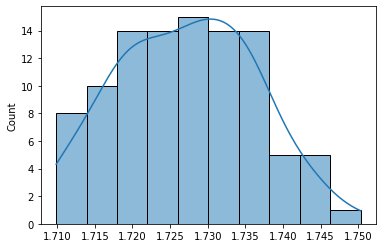

In [ ]:
sns.histplot(error,kde=True,bins=10)

# Preprocessing of Images 

In [ ]:
#create folder
!mkdir /content/ift6758-a20


unzip:  cannot find or open /content/ift6758-a20.zip, /content/ift6758-a20.zip.zip or /content/ift6758-a20.zip.ZIP.


In [ ]:
!unzip /content/ift6758-a20.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_profile_images/profile_images_train/9O6PO4HFOCQ99IHF.png  
  inflating: train_profile_images/profile_images_train/9OGBOKM836P9MHMF.png  
  inflating: train_profile_images/profile_images_train/9OI7OC6A872QJPSH.png  
  inflating: train_profile_images/profile_images_train/9OI8I76J9K28EKQH.png  
  inflating: train_profile_images/profile_images_train/9OPJABRP2617QS4D.png  
  inflating: train_profile_images/profile_images_train/9OT5062HK84PG4N3.png  
  inflating: train_profile_images/profile_images_train/9P0LPSH2KE7K544O.png  
  inflating: train_profile_images/profile_images_train/9P0NH81RQ8CH2ML4.png  
  inflating: train_profile_images/profile_images_train/9P38G80NSFA7KDK6.png  
  inflating: train_profile_images/profile_images_train/9P4FRH3ICREEQL1D.png  
  inflating: train_profile_images/profile_images_train/9PAC0AE37SGQATON.png  
  inflating: train_profile_images/profile_images_train/9PFJD24I7OT7LRS0.png  
  inflating: 

In [ ]:
!cp -r /content/test_profile_images /content/ift6758-a20
!cp -r /content/train_profile_images /content/ift6758-a20
!cp -r /content/test.csv /content/ift6758-a20
!cp -r /content/train.csv /content/ift6758-a20

In [ ]:
!ls /content/ift6758-a20

ift6758-a20.zip  test.csv  test_profile_images	train.csv  train_profile_images


In [ ]:
df_train = pd.read_csv("/content/ift6758-a20/train.csv")
df_test = pd.read_csv("/content/ift6758-a20/test.csv") 

In [ ]:
import glob
import cv2

c= df_train['Profile Image']
t=df_test['Profile Image']

def read_img(img_list, img):
    n = cv2.imread(img, 0)
    img_list.append(n)
    return img_list

pathtr = glob.glob("/content/ift6758-a20/train_profile_images/profile_images_train/*.png") #or jpg
pathte = glob.glob("/content/ift6758-a20/test_profile_images/profile_images_test/*.png") #or jpg
list_ = []#train set
list_t = []# test set

# for training set
for j in range(0,len(c)):
   cv_image = [read_img(list_, c[j])]

#for test set
for l in range(0,len(t)):
   cv_image_t = [read_img(list_t, t[l])]


In [ ]:
from keras.preprocessing.image import load_img
from skimage.feature import hog

fd=[]
fdtest=[]
# training set
for i in range(0,len(pathtr)):
   img = load_img(pathtr[i])
   fd.append(hog(img, orientations=9, pixels_per_cell=(10, 10), 
                    cells_per_block=(2, 2), multichannel=True))
# for test set
for m in range(0,len(pathte)):
   img = load_img(pathte[m])
   fdtest.append(hog(img, orientations=9, pixels_per_cell=(10, 10), 
                    cells_per_block=(2, 2), multichannel=True))  

In [ ]:
from sklearn.decomposition import PCA

for n in np.arange(25):
  pca = PCA(n_components=n).fit(fd)
  exp_vars = pca.explained_variance_ratio_
  total_exp_var = exp_vars.sum()

  if total_exp_var >= 0.85:
    break

print('Number of components required for 85% explained variance = ',n)

Number of components required for 85% explained variance =  24


In [ ]:
pca = PCA(n_components=24)
pca.fit(fd)
print('Component-wise Variance explained = ',pca.explained_variance_ratio_)
print('         Total Variance explained = ',pca.explained_variance_ratio_.sum())

Component-wise Variance explained =  [0.14274545 0.09578483 0.06263867 0.04995256 0.04363701 0.03869775
 0.03453125 0.03200941 0.03091683 0.02520112 0.02448235 0.0229993
 0.02240815 0.02013821 0.01939924 0.0185488  0.01768652 0.01635751
 0.01526787 0.01439438 0.01321084 0.01301294 0.01248605 0.01208347]
         Total Variance explained =  0.79859052290186


In [ ]:
X_r = pca.transform(fd)
X_r_t = pca.transform(fdtest)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=1)
kmeans.fit(X_r)
cluster_labels = kmeans.labels_
print(cluster_labels)

[1 0 1 ... 0 0 2]


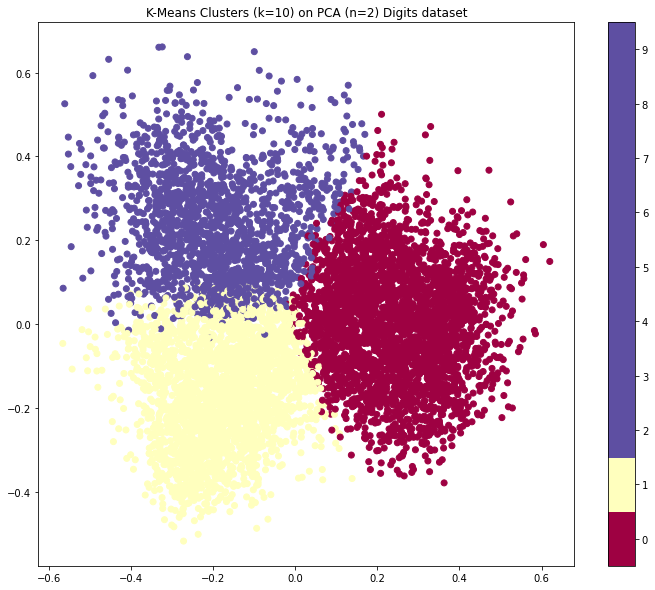

In [ ]:
plt.figure(figsize=(12, 10))  

plt.scatter(X_r[:,0], X_r[:,1], c=cluster_labels, cmap='Spectral')

plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('K-Means Clusters (k=10) on PCA (n=2) Digits dataset')

plt.plot();

In [ ]:
Imageclusters = kmeans.labels_
df = pd.DataFrame(Imageclusters,columns=['Clusters'])


In [ ]:
dft = pd.DataFrame(kmeans.predict(X_r_t),columns=['Clusters'])


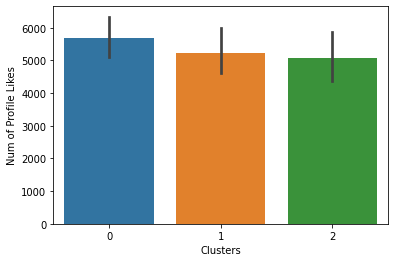

In [ ]:
# Relation of Profile Category with Num of Profile Likes
sns.barplot(x=df['Clusters'], y=df_cleaned['Num of Profile Likes']);

[1] [Comprehensive tutorials for Housing dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/tutorials)

[2] [Titanic Prediction blog post](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8)

[3] [Titanic EDA](https://becominghuman.ai/titanic-survival-dataset-part-1-2-exploratory-data-analysis-5b98f7917913)

[4] [How to almost win Kaggle competitions? - Yanir Seroussi](https://yanirseroussi.com/2014/08/24/how-to-almost-win-kaggle-competitions/)

[5] [Blog post on Tips and Tricks to succeed on Kaggle](https://www.dataquest.io/blog/kaggle-tips-tricks/)